In [1]:
import git
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

pd.set_option('display.max_rows', 1000)

from datetime import datetime
import sys
sys.path.append("../")
from utils import createXYPlot

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import mean_squared_error, mean_absolute_error

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Get data

In [2]:
path = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(path)

In [3]:
df.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

In [4]:
df[["data","casi_da_sospetto_diagnostico"]].head(1)

data  casi_da_sospetto_diagnostico
0  2020-02-24T18:00:00                           NaN

### Funzioni

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
    
# tick on mondays every week
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

    
def createBarPlot(dfplot,y,x="giorno",
                  yerr=None, 
                  title_suffix="", 
                  logscale=False, figwidth=10):

    fig, ax = plt.subplots(figsize=(figwidth,6))

    plt.bar(dfplot[x], dfplot[y],yerr=yerr)
    plt.grid()
    plt.title(f"{y} {title_suffix}",fontsize=16)
    plt.xticks(fontsize=14,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )
    plt.yticks(fontsize=14)
    if logscale: plt.yscale("log")
    plt.show()
    plt.close()
    
    
def multiple_plot(df, yname, brkdwn, xname = "giorno", lista_nomi = ["Lombardia","Piemonte"], title_suffix = "",
                  limit_x=None, limit_y=None):
    
    fig, ax = plt.subplots(figsize=(12,8))

    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    weekdays = mdates.WeekdayLocator(byweekday=MO)
    days = mdates.DayLocator()
    years_fmt = mdates.DateFormatter('%Y-%m-%d')


    # format the ticks
    ax.xaxis.set_major_locator(weekdays)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(days)

    for nome in lista_nomi:
        dfp = df[df[brkdwn]==nome]
        plt.plot(dfp[xname],dfp[yname],"-o",label=nome)

    #print(dfp.reset_index()[0])
    #plt.plot(dfp['giorno'],dfp["expected"],"-o")
    
    plt.grid(which="both")
    fig.autofmt_xdate()
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.xticks(fontsize=14)
    if limit_x: plt.xlim(limit_x[0],limit_x[1])
    if limit_y: plt.ylim(limit_y[0],limit_y[1])
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12)
    plt.title(f"{yname} per {brkdwn} {title_suffix}", fontsize=18)

    plt.show()
    plt.close()
    

    
    
def get_provinces_by_regio(regione):
    return [ x for x in list(df_prov[df_prov["denominazione_regione"]==regione]["denominazione_provincia"].unique()) if "aggiornamento" not in x ]



def plot_summary(dfplot, suffix):
    fig, ax = plt.subplots(figsize=(16,8),dpi=300)

    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    weekdays = mdates.WeekdayLocator(byweekday=MO)
    days = mdates.DayLocator()
    years_fmt = mdates.DateFormatter('%Y-%m-%d')

    WIDTH=0.35
    DAY_INTERVAL = 14

    df_bar = dfplot.sort_values(by="data",ascending=True).reset_index()
    
    #print(df_bar.head())
    
    indexes = np.arange(0,len(df_bar.index),DAY_INTERVAL)
    labels = [ str(df_bar["giorno"].tolist()[i]) for i in indexes]

    #print(labels)

    plt.bar(df_bar.index,df_bar["nuovi_positivi"],label="contagiati",alpha=0.5,width=WIDTH,color="red",align="center")
    plt.bar(df_bar.index-WIDTH,df_bar["variazione_deceduti"],label="deceduti",alpha=0.6,width=WIDTH,color="black",align="center")
    plt.bar(df_bar.index+WIDTH,df_bar["variazione_guariti"],label="guariti",alpha=0.6,width=WIDTH,color="green",align="center")
    plt.plot(df_bar.index,df_bar["nuovi_positivi_media_7"],label="contagiati (media mobile)", linewidth=3,color="darkred")

    plt.xticks(indexes,
               labels = labels, 
               fontsize=15, 
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right",
              )
    plt.grid()
    plt.title(f"Aggiornamento {suffix}",fontsize=20)
    plt.legend(fontsize=14,loc="upper left")
    plt.yticks(fontsize=15)
    plt.savefig(f"./plots/{oggi}/aggiornamento_{suffix}.png",bbox_inches="tight")
    del(fig)

### Valori nazionali

In [6]:
df = getVariables(df)
oggi = df["giorno"][0]
print(oggi)

import subprocess
plots_folder = f"./plots/{oggi}"
print(plots_folder)
res = subprocess.run(f"mkdir -p {plots_folder}",shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

2022-01-14
./plots/2022-01-14


/Users/acastelli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


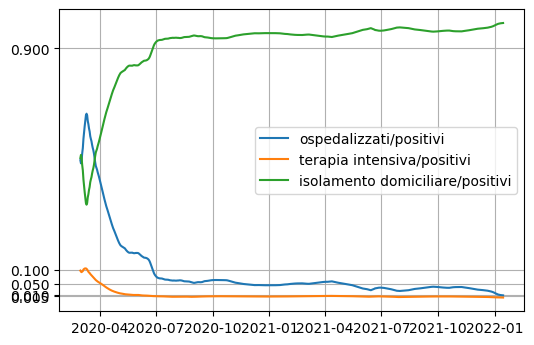

In [7]:
plt.figure(dpi=100)
plt.plot(df["giorno"],df["frazione_ospedalizzati_media_7"],label="ospedalizzati/positivi")
plt.plot(df["giorno"],df["frazione_terapia_intensiva_media_7"],label="terapia intensiva/positivi")
plt.plot(df["giorno"],df["frazione_isolamento_domiciliare_media_7"],label="isolamento domiciliare/positivi")
plt.grid()
plt.legend()
_=plt.yticks([0.005,0.01,0.05,0.1,0.9])

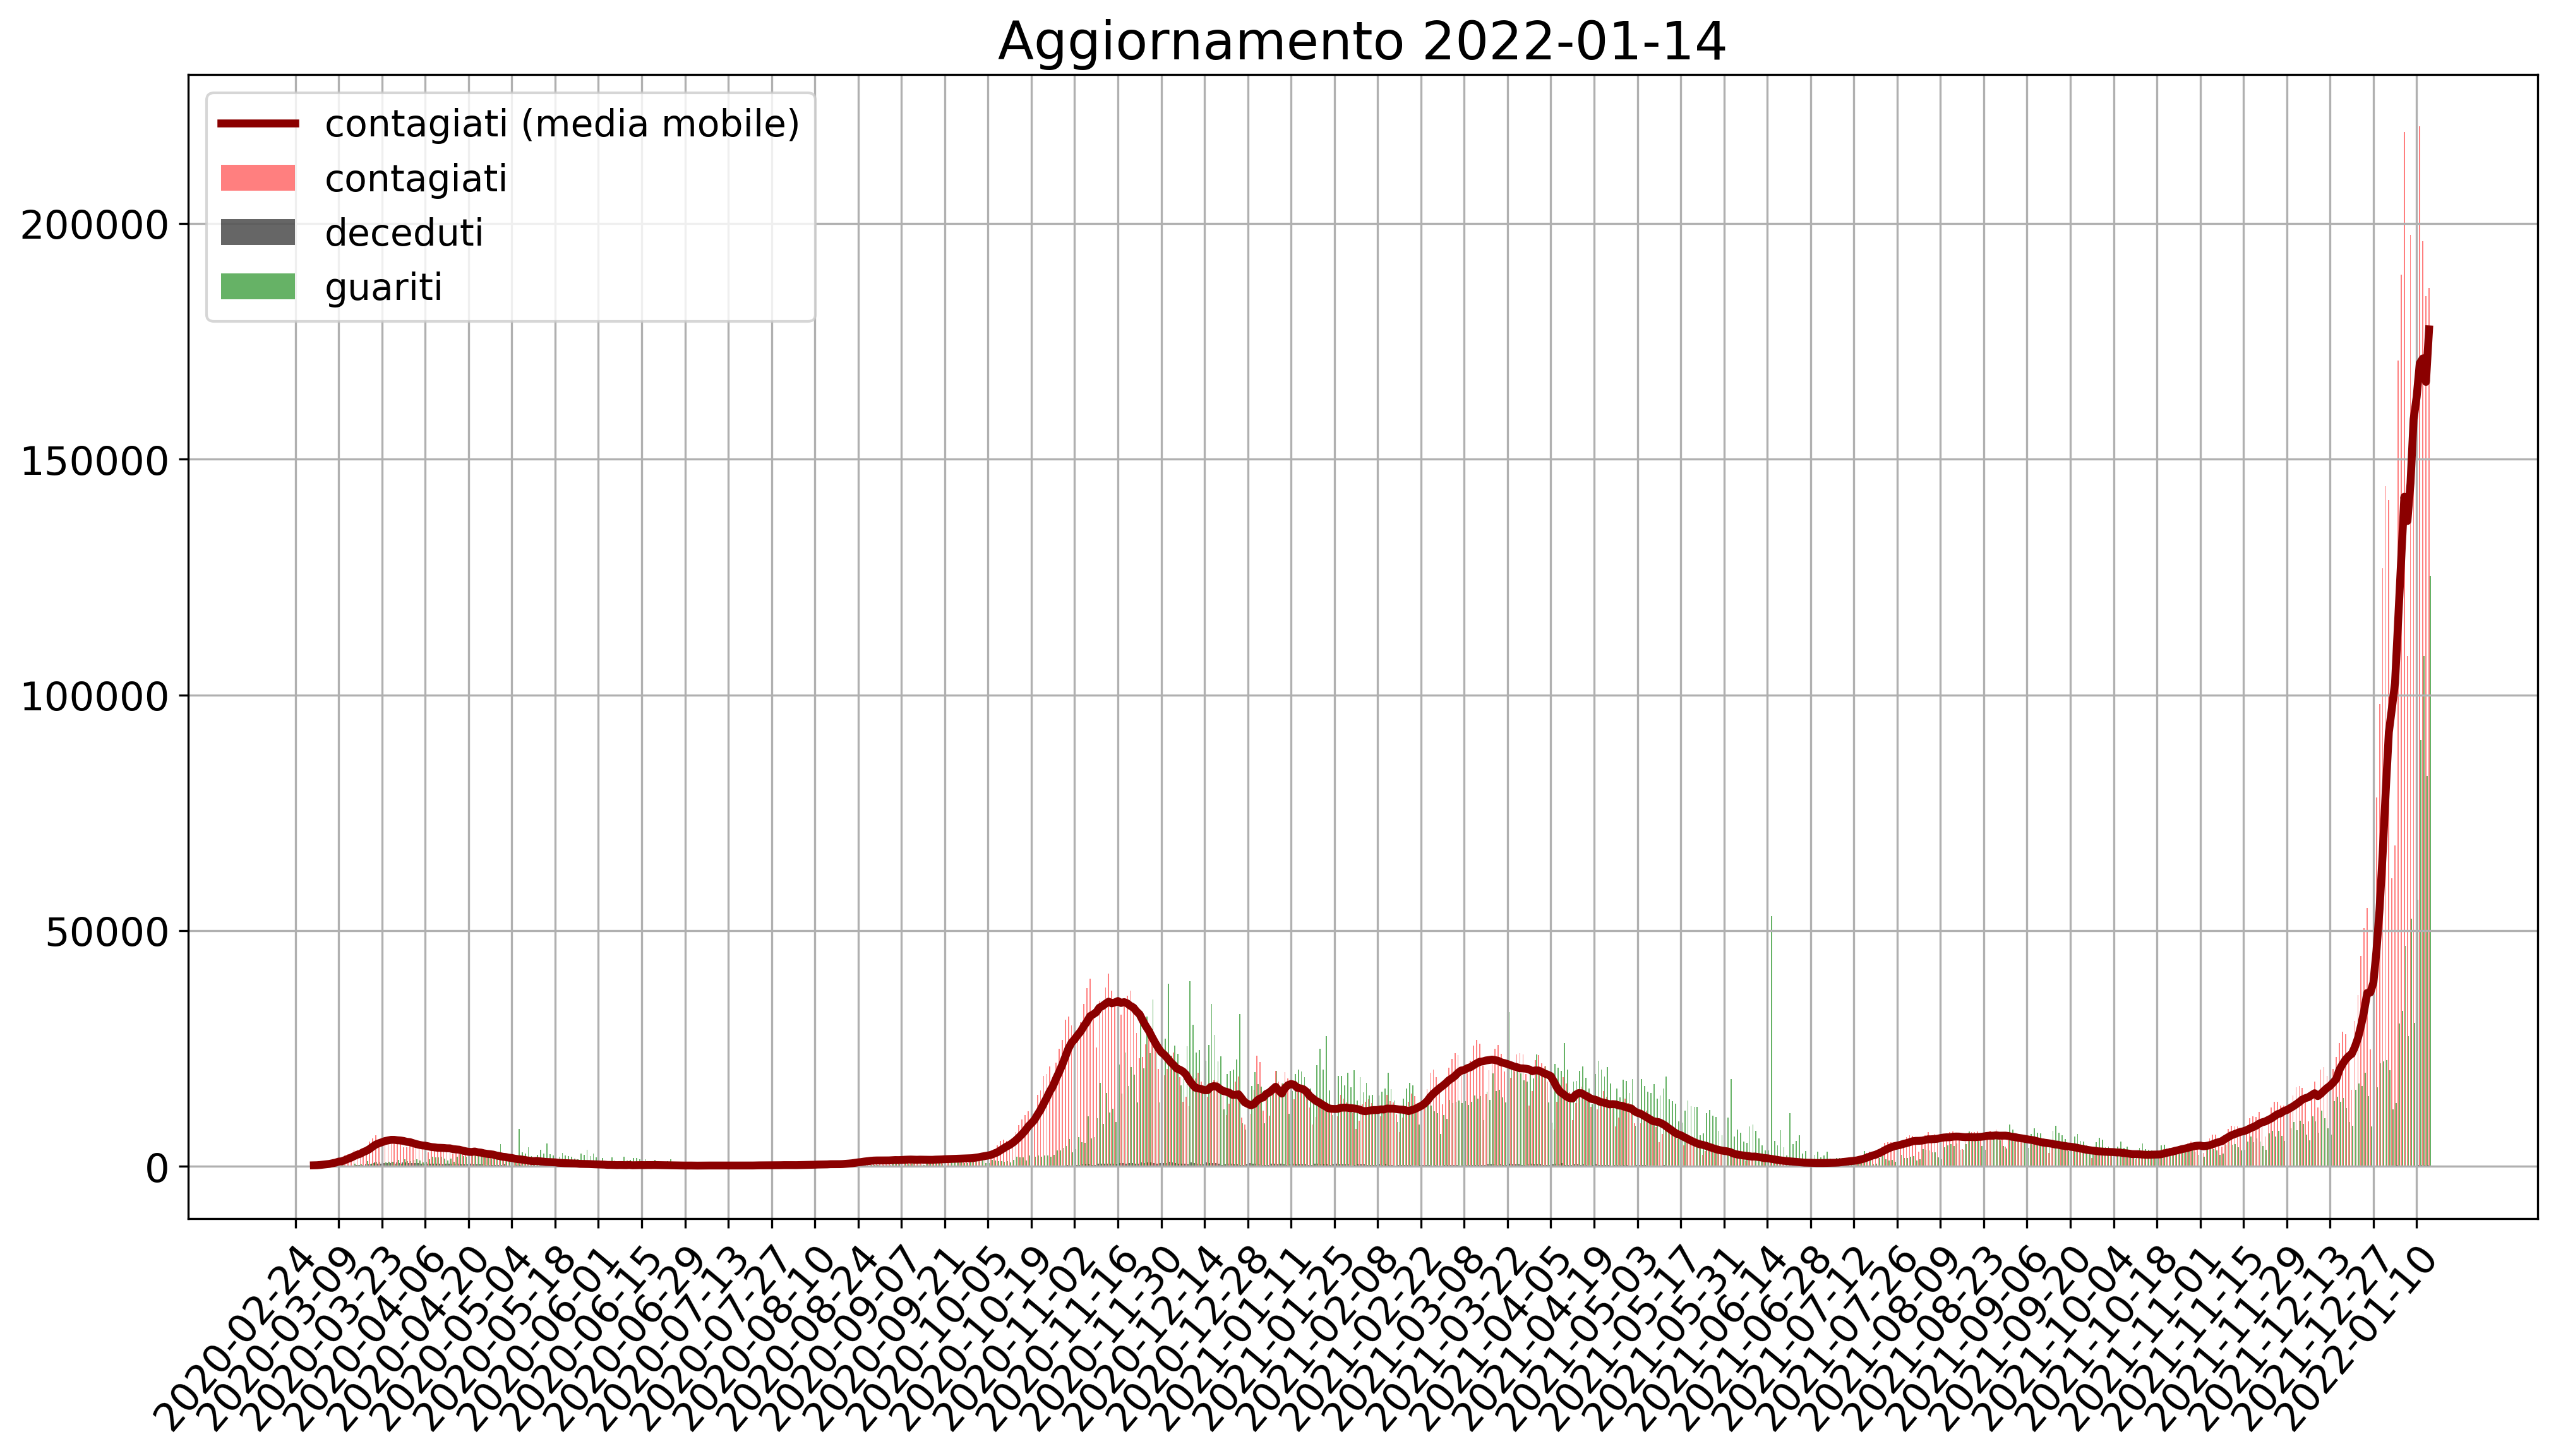

In [8]:
plot_summary(df, suffix=oggi)

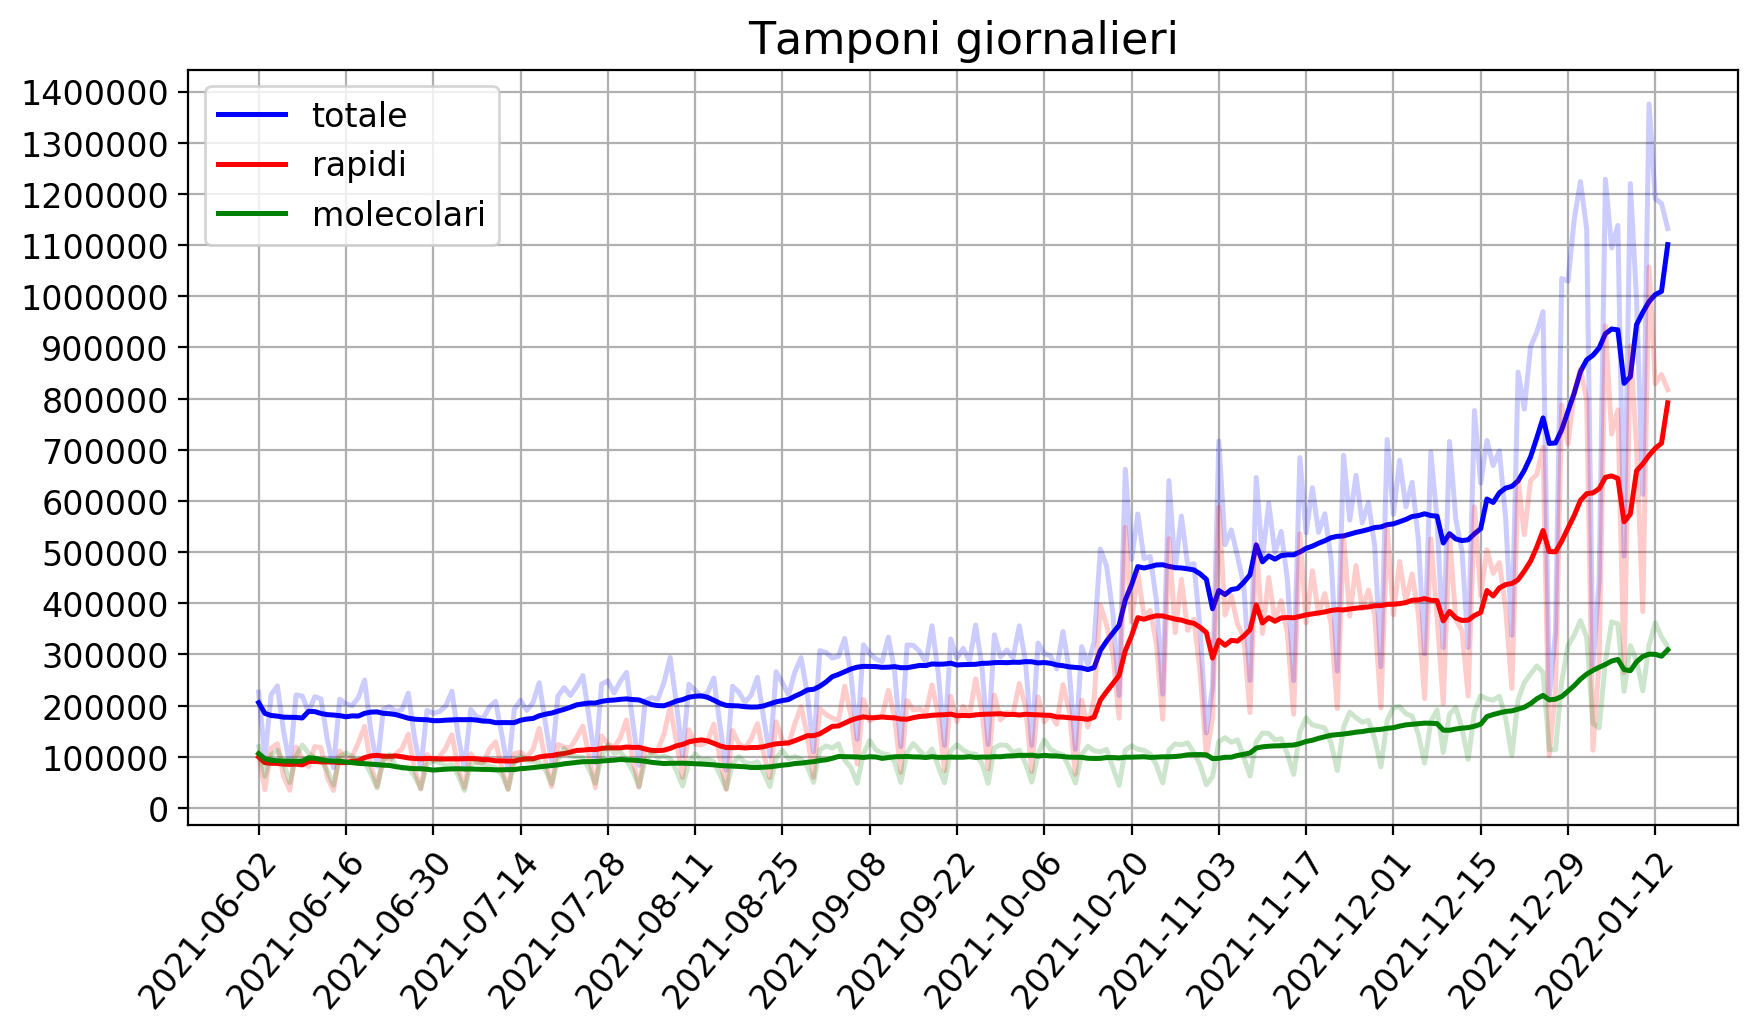

In [10]:
createXYPlot(df,
             days_interval = 14,
             bar_width=0.75,
             dpis=200,
             linewidth=1.8,
             y=["variazione_tamponi",
                "variazione_tamponi_media_7",
                "variazione_tamponi_rapidi",
                "variazione_tamponi_rapidi_media_7",
                "variazione_tamponi_molecolari",
                "variazione_tamponi_molecolari_media_7",
               ],
             alphas=[0.2,1.0,0.2,1.0,0.2,1.0],
             colors=["b","b","r","r","g","g"],
             labels=[None,
                     "totale",
                     None,
                     "rapidi",
                     None,
                     "molecolari"
                    ],
             x="giorno",
             plots_folder=plots_folder,
             savename="tamponi.png",
             figsize_x=10,
             figsize_y=5,
             start_date="2021-06-01",
             title="Tamponi giornalieri",
             yticks=np.arange(0,1.5e6,1e5))

In [11]:
df

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0   2022-01-14 17:00:00   ITA                   18019               1679   
1   2022-01-13 17:00:00   ITA                   17648               1668   
2   2022-01-12 17:00:00   ITA                   17309               1669   
3   2022-01-11 17:00:00   ITA                   17067               1677   
4   2022-01-10 17:00:00   ITA                   16340               1606   
5   2022-01-09 17:00:00   ITA                   15647               1595   
6   2022-01-08 17:00:00   ITA                   14930               1557   
7   2022-01-07 17:00:00   ITA                   14591               1499   
8   2022-01-06 17:00:00   ITA                   13827               1467   
9   2022-01-05 17:00:00   ITA                   13364               1428   
10  2022-01-04 17:00:00   ITA                   12912               1392   
11  2022-01-03 17:00:00   ITA                   12333               1351   
12  2022-01-02 17:00:00   ITA                   11756               1319   
13  2022-01-01 17:00:00   ITA                   11265               1297   
14  2021-12-31 17:00:00   ITA                   11150               1260   
15  2021-12-30 17:00:00   ITA                   10866               1226   
16  2021-12-29 17:00:00   ITA                   10578               1185   
17  2021-12-28 17:00:00   ITA                   10089               1145   
18  2021-12-27 17:00:00   ITA                    9723               1126   
19  2021-12-26 17:00:00   ITA                    9220               1089   
20  2021-12-25 17:00:00   ITA                    8892               1071   
21  2021-12-24 17:00:00   ITA                    8812               1038   
22  2021-12-23 17:00:00   ITA                    8722               1023   
23  2021-12-22 17:00:00   ITA                    8544               1010   
24  2021-12-21 17:00:00   ITA                    8381               1012   
25  2021-12-20 17:00:00   ITA                    8101                987   
26  2021-12-19 17:00:00   ITA                    7726                966   
27  2021-12-18 17:00:00   ITA                    7576                953   
28  2021-12-17 17:00:00   ITA                    7520                923   
29  2021-12-16 17:00:00   ITA                    7338                917   
30  2021-12-15 17:00:00   ITA                    7309                870   
31  2021-12-14 17:00:00   ITA                    7163                863   
32  2021-12-13 17:00:00   ITA                    6951                856   
33  2021-12-12 17:00:00   ITA                    6697                829   
34  2021-12-11 17:00:00   ITA                    6539                818   
35  2021-12-10 17:00:00   ITA                    6483                816   
36  2021-12-09 17:00:00   ITA                    6333                811   
37  2021-12-08 17:00:00   ITA                    6099                791   
38  2021-12-07 17:00:00   ITA                    6078                776   
39  2021-12-06 17:00:00   ITA                    5879                743   
40  2021-12-05 17:00:00   ITA                    5597                736   
41  2021-12-04 17:00:00   ITA                    5428                732   
42  2021-12-03 17:00:00   ITA                    5385                708   
43  2021-12-02 17:00:00   ITA                    5298                698   
44  2021-12-01 17:00:00   ITA                    5248                686   
45  2021-11-30 17:00:00   ITA                    5227                683   
46  2021-11-29 17:00:00   ITA                    5135                669   
47  2021-11-28 17:00:00   ITA                    4964                638   
48  2021-11-27 17:00:00   ITA                    4826                624   
49  2021-11-26 17:00:00   ITA                    4748                606   
50  2021-11-25 17:00:00   ITA                    4689                588   
51  2021-11-24 17:00:00   ITA                    4629              

In [12]:
df[["giorno","variazione_tamponi","variazione_tamponi_molecolari","nuovi_positivi"]].sort_values(by="variazione_tamponi", ascending=False)

giorno  variazione_tamponi  variazione_tamponi_molecolari  \
3    2022-01-11           1375514.0                       317992.0   
10   2022-01-04           1228410.0                       286076.0   
14   2021-12-31           1224025.0                       366164.0   
6    2022-01-08           1220266.0                       317328.0   
2    2022-01-12           1190567.0                       361587.0   
1    2022-01-13           1181179.0                       334148.0   
15   2021-12-30           1150352.0                       338028.0   
8    2022-01-06           1138310.0                       360271.0   
0    2022-01-14           1132309.0                       314996.0   
13   2022-01-01           1130936.0                       333682.0   
9    2022-01-05           1094255.0                       363679.0   
17   2021-12-28           1034677.0                       247476.0   
16   2021-12-29           1029429.0                       317536.0   
5    2022-01-09            993201.0                       288078.0   
20   2021-12-25            969752.0                       264873.0   
21   2021-12-24            929775.0                       277690.0   
22   2021-12-23            901450.0                       261745.0   
24   2021-12-21            851865.0                       211710.0   
23   2021-12-22            779303.0                       245079.0   
31   2021-12-14            776563.0                       188050.0   
45   2021-11-30            719972.0                       171012.0   
29   2021-12-16            718281.0                       213385.0   
72   2021-11-03            717311.0                       129514.0   
35   2021-12-10            716287.0                       183313.0   
27   2021-12-18            697740.0                       218357.0   
38   2021-12-07            695136.0                       169314.0   
52   2021-11-23            689280.0                       157614.0   
59   2021-11-16            684710.0                       148944.0   
43   2021-12-02            679462.0                       197908.0   
28   2021-12-17            669160.0                       210788.0   
87   2021-10-19            662000.0                       113178.0   
50   2021-11-25            649998.0                       176281.0   
66   2021-11-09            645689.0                       129100.0   
80   2021-10-26            639745.0                       113335.0   
41   2021-12-04            636592.0                       179320.0   
30   2021-12-15            634638.0                       219187.0   
57   2021-11-18            625774.0                       162261.0   
4    2022-01-10            612821.0                       228978.0   
48   2021-11-27            596898.0                       171173.0   
64   2021-11-11            595812.0                       145540.0   
42   2021-12-03            588445.0                       184518.0   
55   2021-11-20            574812.0                       156009.0   
85   2021-10-21            574671.0                       114848.0   
44   2021-12-01            573775.0                       196357.0   
78   2021-10-28            570335.0                       123470.0   
26   2021-12-19            566300.0                       175726.0   
34   2021-12-11            565077.0                       196224.0   
37   2021-12-08            564698.0                       191327.0   
51   2021-11-24            562505.0                       187375.0   
49   2021-11-26            557180.0                       167810.0   
70   2021-11-05            543414.0                       128435.0   
62   2021-11-13            540371.0                       135310.0   
56   2021-11-19            538488.0                       159633.0   
58   2021-11-17            537765.0                       175951.0   
40   2021-12-05            525108.0                       143963.0   
71   2021-11-04            514629.0                       137495.0   
47   2021-11-28    

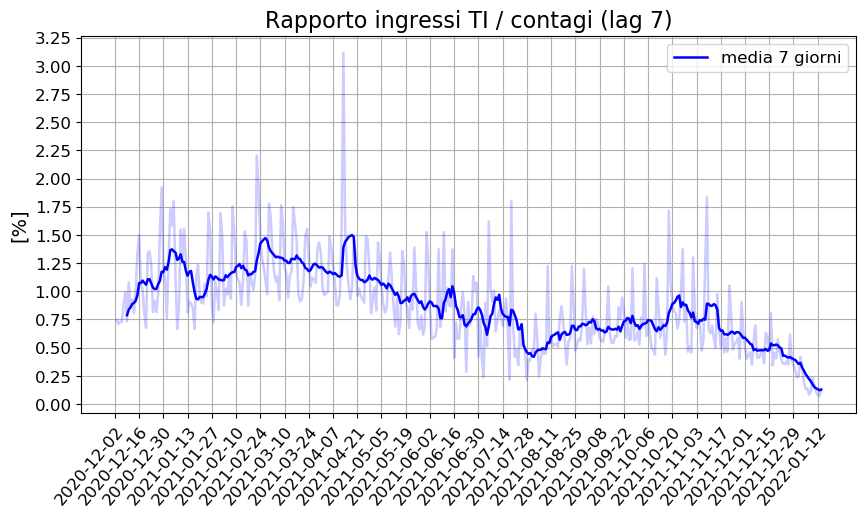

In [13]:
createXYPlot(df, x="giorno", 
             y=["ti_ratio",
                "ti_ratio_media_7"], 
             plots_folder=plots_folder,
             start_date="2020-12-01",
             days_interval=14,
             linewidth=1.8,
             colors=["b","b"],
             alphas=[0.2,1],
             figsize_x=10,
             figsize_y=5,
             labels=[None, "media 7 giorni"],
             title="Rapporto ingressi TI / contagi (lag 7)",
             savename="ti_ratio",
             yticks=np.arange(0,3.5,0.25),
             ytitle="[%]"
            )

In [14]:
df[["ingressi_terapia_intensiva_lag_7","variazione_deceduti"]]

ingressi_terapia_intensiva_lag_7  variazione_deceduti
0                               120.0                360.0
1                               177.0                316.0
2                               132.0                313.0
3                               153.0                294.0
4                               103.0                227.0
5                               104.0                157.0
6                               135.0                184.0
7                               119.0                223.0
8                               134.0                198.0
9                               126.0                231.0
10                              119.0                259.0
11                              100.0                140.0
12                               85.0                133.0
13                              106.0                111.0
14                              102.0                155.0
15                               93.0                156.0
16                               92.0                148.0
17                               96.0                190.0
18                               73.0                142.0
19                               78.0                 81.0
20                               95.0                144.0
21                               70.0                141.0
22                              101.0                168.0
23                               84.0                146.0
24                               93.0                153.0
25                               60.0                137.0
26                               54.0                 97.0
27                               76.0                123.0
28                               76.0                120.0
29                               69.0                123.0
30                               62.0                129.0
31                               89.0                120.0
32                               45.0                 98.0
33                               45.0                 66.0
34                               59.0                 96.0
35                               60.0                118.0
36                               55.0                 79.0
37                               62.0                 86.0
38                               64.0                 99.0
39                               58.0                 92.0
40                               39.0                 43.0
41                               68.0                 75.0
42                               58.0                 74.0
43                               57.0                 72.0
44                               49.0                103.0
45                               61.0                 89.0
46                               54.0                 65.0
47                               35.0                 47.0
48                               50.0                 90.0
49                               39.0                 51.0
50                               55.0                 71.0
51                               39.0                 85.0
52                               41.0                 83.0
53                               41.0                 70.0
54                               29.0                 46.0
55                               39.0                 49.0
56                               47.0                 48.0
57                               37.0                 69.0
58                               34.0                 72.0
59                               52.0                 74.0
60                               35.0                 44.0
61                               26.0                 36.0
62                               23.0                 53.0
63                               37.0                 68.0
64                               36.0                 67.0
65                               31.0                 60.0
66                               34.0               

In [15]:
df.sort_values(by="tasso_positivi_test_rapido",ascending=False)[["giorno","tasso_positivi_test_rapido"]].head(10)

giorno  tasso_positivi_test_rapido
7  2022-01-07                   16.052511
8  2022-01-06                   15.824271
4  2022-01-10                   15.752274
0  2022-01-14                   15.592435
2  2022-01-12                   14.873700
3  2022-01-11                   13.749028
9  2022-01-05                   13.296358
1  2022-01-13                   13.282395
5  2022-01-09                   12.815778
6  2022-01-08                   12.616702

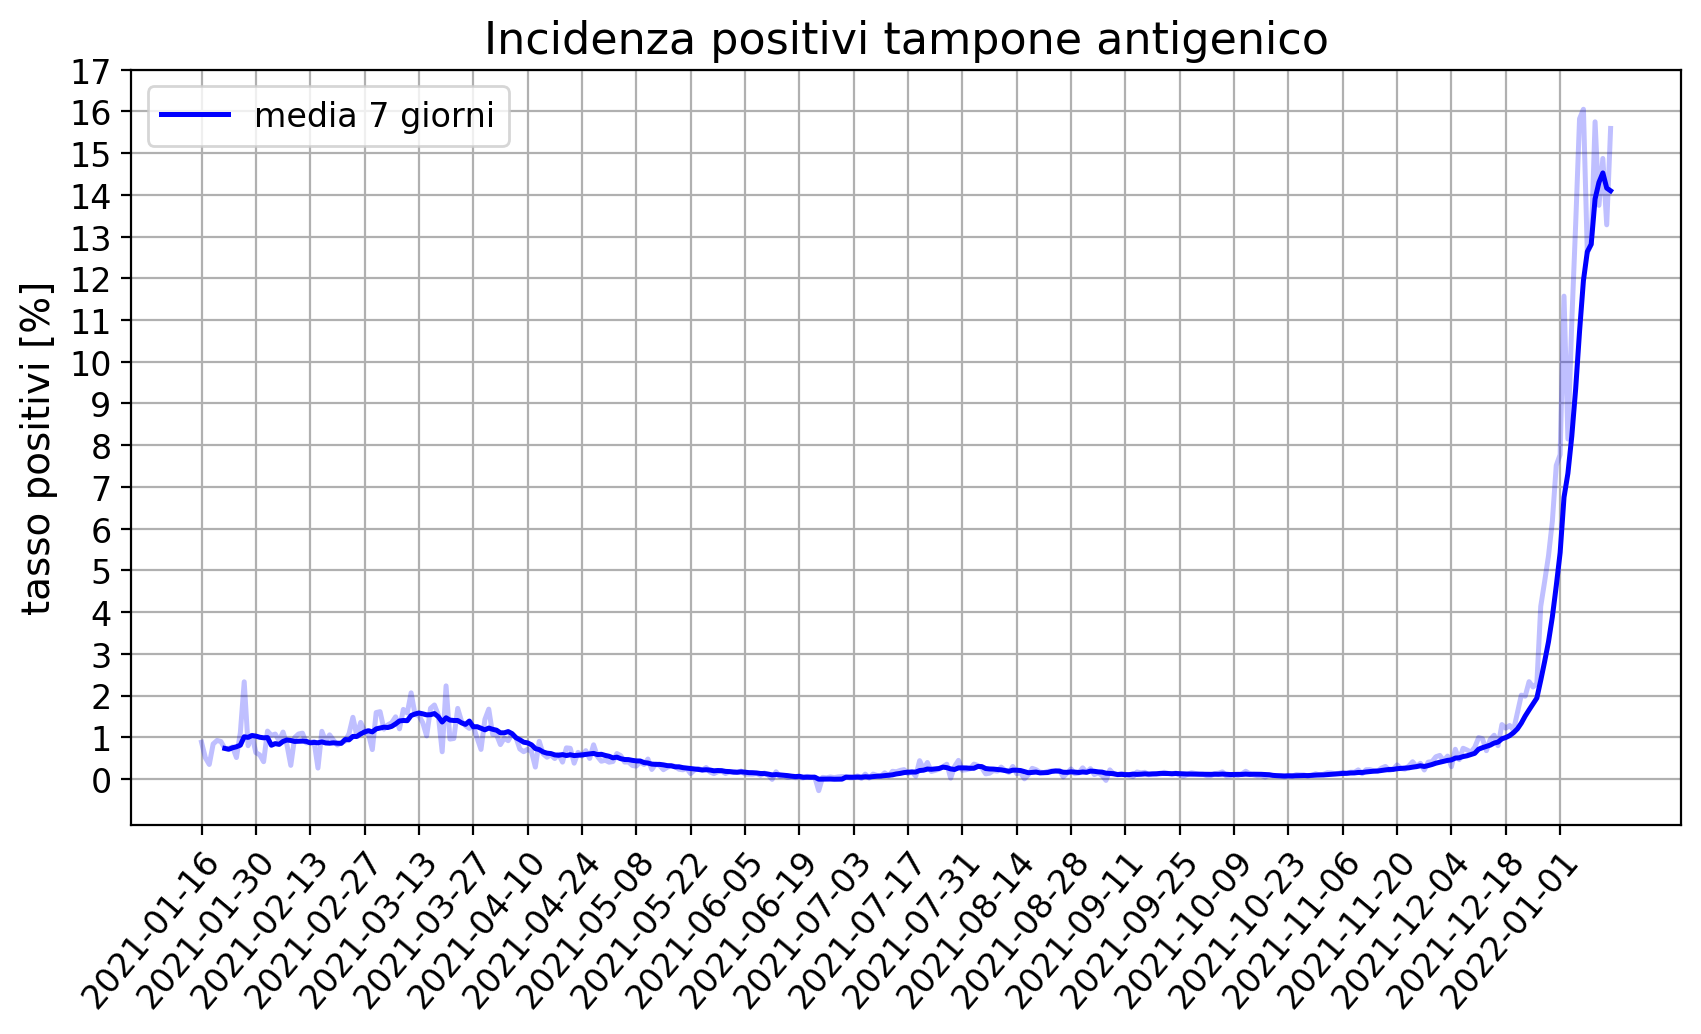

In [16]:
createXYPlot(df,
             days_interval = 14,
             x="giorno",
             linewidth=1.8,
             dpis=200,
             ytitle="tasso positivi [%]",
             y=[
                "tasso_positivi_test_rapido",
                "tasso_positivi_test_rapido_media_7", 
               ],
             labels=[None,"media 7 giorni"],
             alphas=[0.25,1],
             colors=["b","b"],
             plots_folder=plots_folder,
             title="Incidenza positivi tampone antigenico",
             start_date="2021-01-15",
             figsize_x=10,
             figsize_y=5,
             yticks=np.arange(0.00, 18.0, 1.0),
             savename="tasso_positivi_tampone_rapido.png")

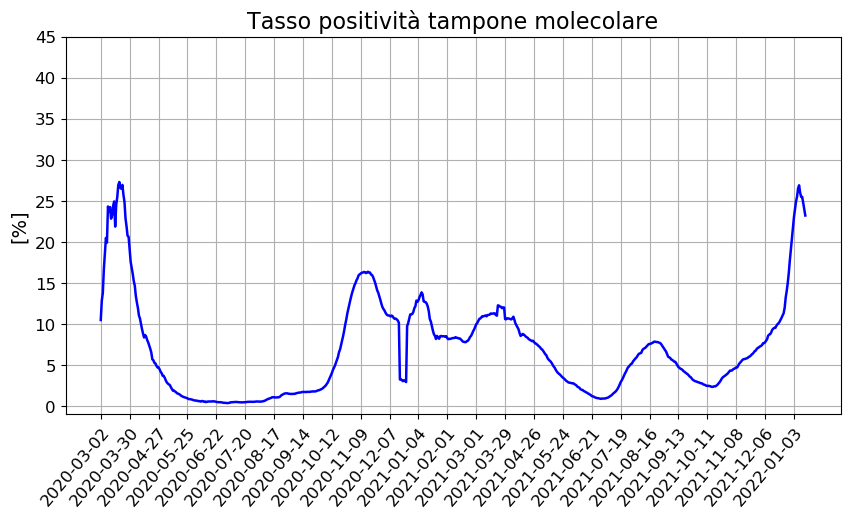

In [17]:
createXYPlot(df,y=["tasso_positivi_test_molecolare_media_7"],
             x="giorno",
             days_interval=28,
             start_date="2020-01-01",
             plots_folder=plots_folder,
             remove_negative=True,
             colors=["b"],
             linewidth=1.8,
             yticks=np.arange(0,50,5),
             title="Tasso positività tampone molecolare",
             ytitle="[%]",
             figsize_x=10,
             figsize_y=5,
             savename="tasso_positivi_tampone_molecolare.png",
            )

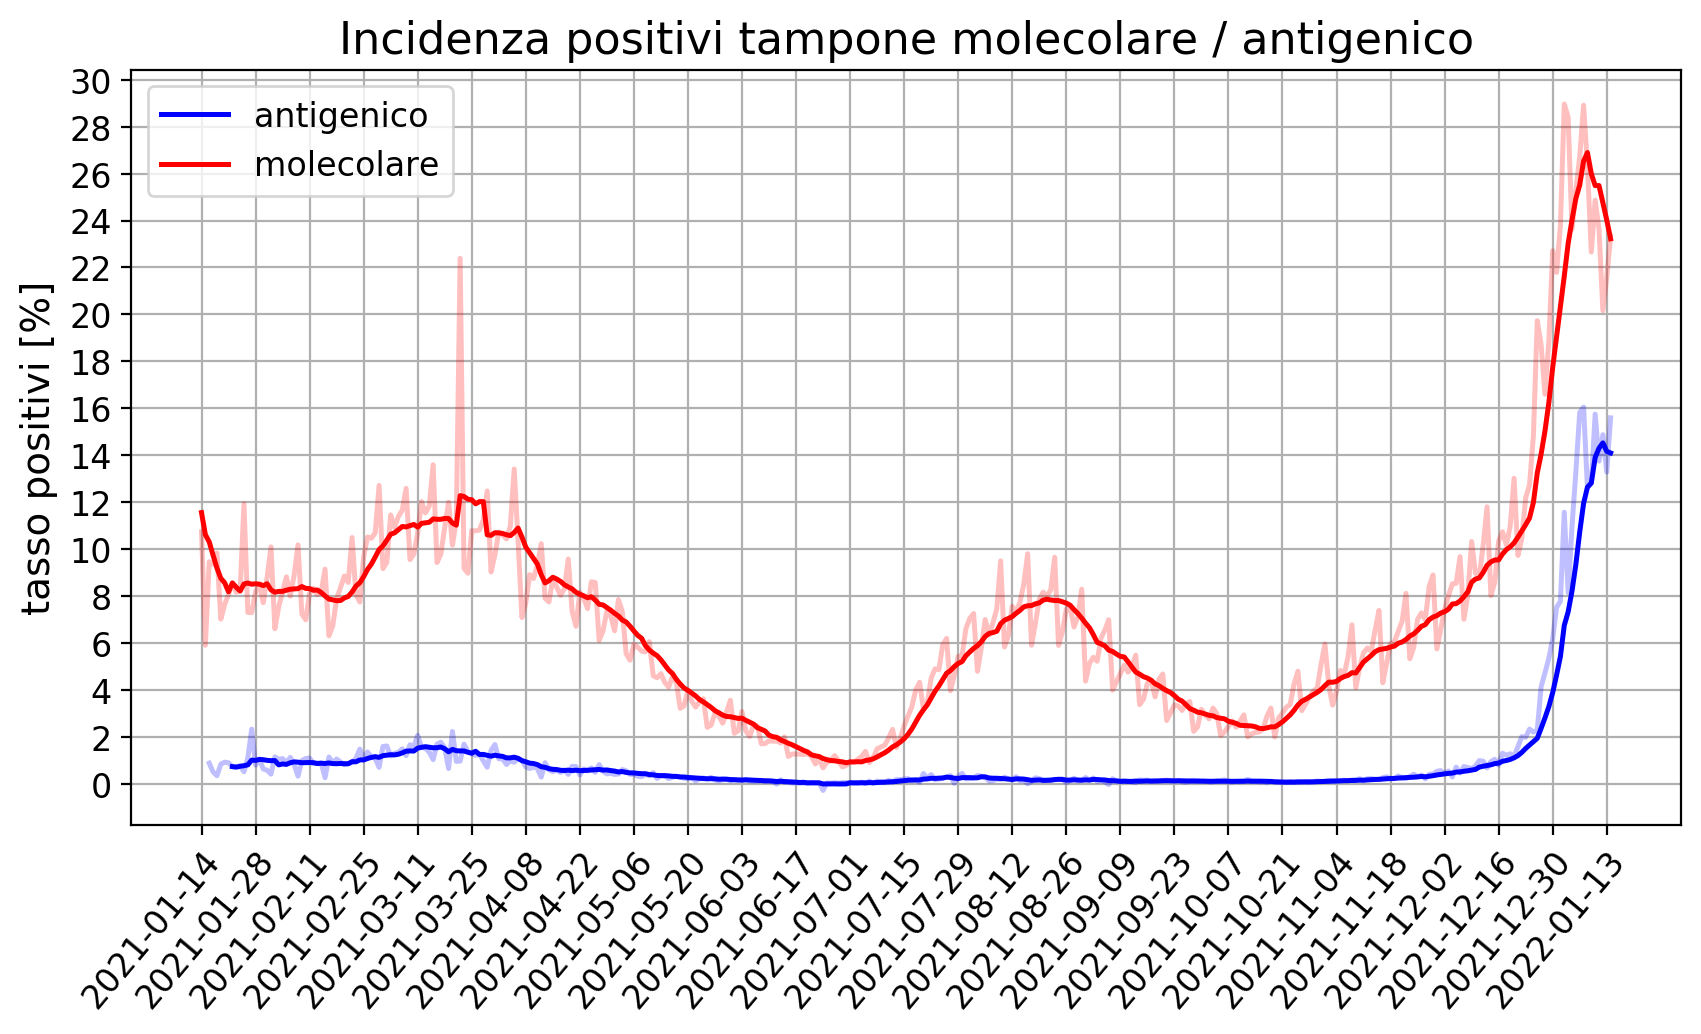

In [18]:
createXYPlot(df,
             days_interval = 14,
             x="giorno",
             linewidth=1.8,
             dpis=200,
             ytitle="tasso positivi [%]",
             y=[
                "tasso_positivi_test_rapido",
                "tasso_positivi_test_rapido_media_7",
                "tasso_positivi_test_molecolare",
                "tasso_positivi_test_molecolare_media_7",
               ],
             colors=["b","b","r","r"],
             alphas=[0.25,1,0.25,1],
             labels=[None,"antigenico",None,"molecolare"],
             plots_folder=plots_folder,
             title="Incidenza positivi tampone molecolare / antigenico",
             start_date="2021-01-13",
             figsize_x=10,
             figsize_y=5,
             yticks=np.arange(0,32,2),
             savename="tasso_positivi.png")

In [19]:
df.sort_values(by=["tasso_positivi_test_molecolare"], ascending=False)[["data","tasso_positivi_test_molecolare","variazione_tamponi_molecolari"]]

data  tasso_positivi_test_molecolare  \
676 2020-03-09 18:00:00                       46.207251   
668 2020-03-17 17:00:00                       32.968677   
666 2020-03-19 17:00:00                       30.877234   
680 2020-03-05 18:00:00                       30.455446   
671 2020-03-14 17:00:00                       29.934943   
12  2022-01-02 17:00:00                       28.962627   
7   2022-01-07 17:00:00                       28.912373   
11  2022-01-03 17:00:00                       28.409693   
662 2020-03-23 17:00:00                       28.061643   
8   2022-01-06 17:00:00                       26.732932   
6   2022-01-08 17:00:00                       26.349392   
9   2022-01-05 17:00:00                       25.282736   
667 2020-03-18 17:00:00                       24.917081   
664 2020-03-21 17:00:00                       24.897479   
4   2022-01-10 17:00:00                       24.867455   
665 2020-03-20 17:00:00                       24.828902   
669 2020-03-16 17:00:00                       24.749292   
661 2020-03-24 17:00:00                       24.418496   
13  2022-01-01 17:00:00                       23.785820   
3   2022-01-11 17:00:00                       23.623236   
10  2022-01-04 17:00:00                       23.622744   
0   2022-01-14 17:00:00                       23.311407   
684 2020-03-01 18:00:00                       22.952149   
670 2020-03-15 17:00:00                       22.824083   
15  2021-12-30 17:00:00                       22.712911   
5   2022-01-09 17:00:00                       22.658794   
298 2021-03-22 17:00:00                       22.387011   
672 2020-03-13 17:00:00                       22.192211   
663 2020-03-22 17:00:00                       22.081017   
678 2020-03-07 18:00:00                       21.865685   
14  2021-12-31 17:00:00                       21.789963   
1   2022-01-13 17:00:00                       21.568586   
656 2020-03-29 17:00:00                       21.290402   
673 2020-03-12 17:00:00                       20.619118   
2   2022-01-12 17:00:00                       20.162506   
19  2021-12-26 17:00:00                       19.733051   
679 2020-03-06 18:00:00                       19.464598   
660 2020-03-25 17:00:00                       18.958553   
677 2020-03-08 18:00:00                       18.946032   
16  2021-12-29 17:00:00                       18.878804   
18  2021-12-27 17:00:00                       18.705276   
674 2020-03-11 17:00:00                       18.663762   
682 2020-03-03 18:00:00                       18.558343   
658 2020-03-27 17:00:00                       18.047185   
424 2020-11-16 17:00:00                       17.917898   
377 2021-01-02 17:00:00                       17.612469   
425 2020-11-15 17:00:00                       17.400589   
655 2020-03-30 17:00:00                       17.360367   
433 2020-11-07 17:00:00                       17.184135   
431 2020-11-09 17:00:00                       17.106786   
432 2020-11-08 17:00:00                       17.063575   
657 2020-03-28 17:00:00                       16.853330   
659 2020-03-26 17:00:00                       16.804588   
17  2021-12-28 17:00:00                       16.597973   
438 2020-11-02 17:00:00                       16.394928   
426 2020-11-14 17:00:00                       16.361800   
439 2020-11-01 17:00:00                       16.301913   
428 2020-11-12 17:00:00                       16.183439   
434 2020-11-06 17:00:00                       16.140793   
430 2020-11-10 17:00:00                       16.117892   
427 2020-11-13 17:00:00                       16.045789   
435 2020-11-05 17:00:00                       15.692365   
420 2020-11-20 17:00:00                       15.642838   
437 2020-11-03 17:00:00                       15.494248   
423 2020-11-17 17:00:00                       15.442439   
683 2020-03-02 18:00:00                       15.419297   
417 2020-11-23 17:00:00                       15.394944   
418 202

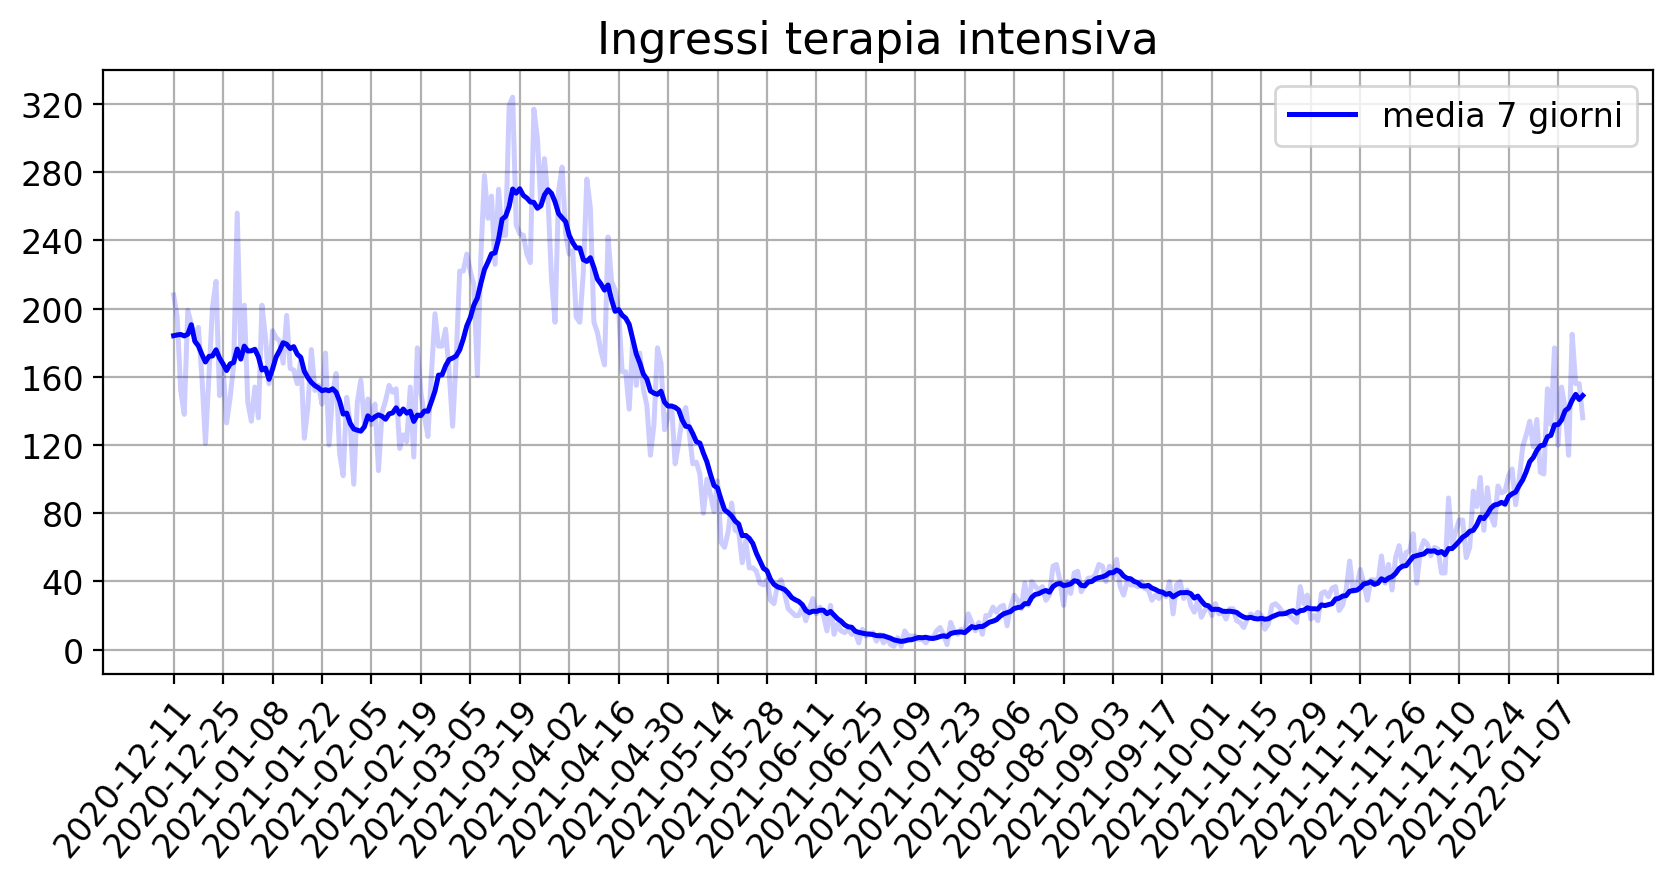

In [20]:
createXYPlot(df,
             days_interval = 14,
             x="giorno",
             linewidth=1.8,
             dpis=200,
             y=["ingressi_terapia_intensiva",
                "ingressi_terapia_intensiva_media_7"
               ],
             labels=[None,"media 7 giorni"],
             alphas=[0.2,1],
             colors=["b","b"],
             plots_folder=plots_folder,
             start_date="2020-12-10",
             yticks=np.arange(0,340,40),
             figsize_x=10,
             figsize_y=4,
             title="Ingressi terapia intensiva",
             savename="ingressi_ti")

In [21]:
def stakHist(df, var_names, startDate):
    
    fig, ax = plt.subplots(dpi=200,figsize=(20,8))
    dfplot = df[df.giorno >= datetime.strptime(startDate,"%Y-%m-%d").date()]
    dfplot = dfplot.sort_values(by="giorno",ascending=True).reset_index()
    
    indexes = np.arange(0,len(dfplot.index),4)
    labels = [ str(dfplot["giorno"].tolist()[i]) for i in indexes]
    
    
    for name in var_names.keys():
        y = dfplot[name]
        if name == "variazione_deceduti": y = -y
        plt.bar(dfplot.index+var_names[name][0], y, color=var_names[name][1],label=name, alpha=0.6,width=0.3,align="center")
    plt.xticks(indexes,
               labels,
               fontsize=14,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )
    plt.yticks(fontsize=16)
    plt.grid()
    plt.legend(fontsize=16)
    plt.title("Variazione Terapia intensiva",fontsize=20)
    plt.savefig(f"./plots/{oggi}/ti_morti_ingressi.png",bbox_inches="tight")
        

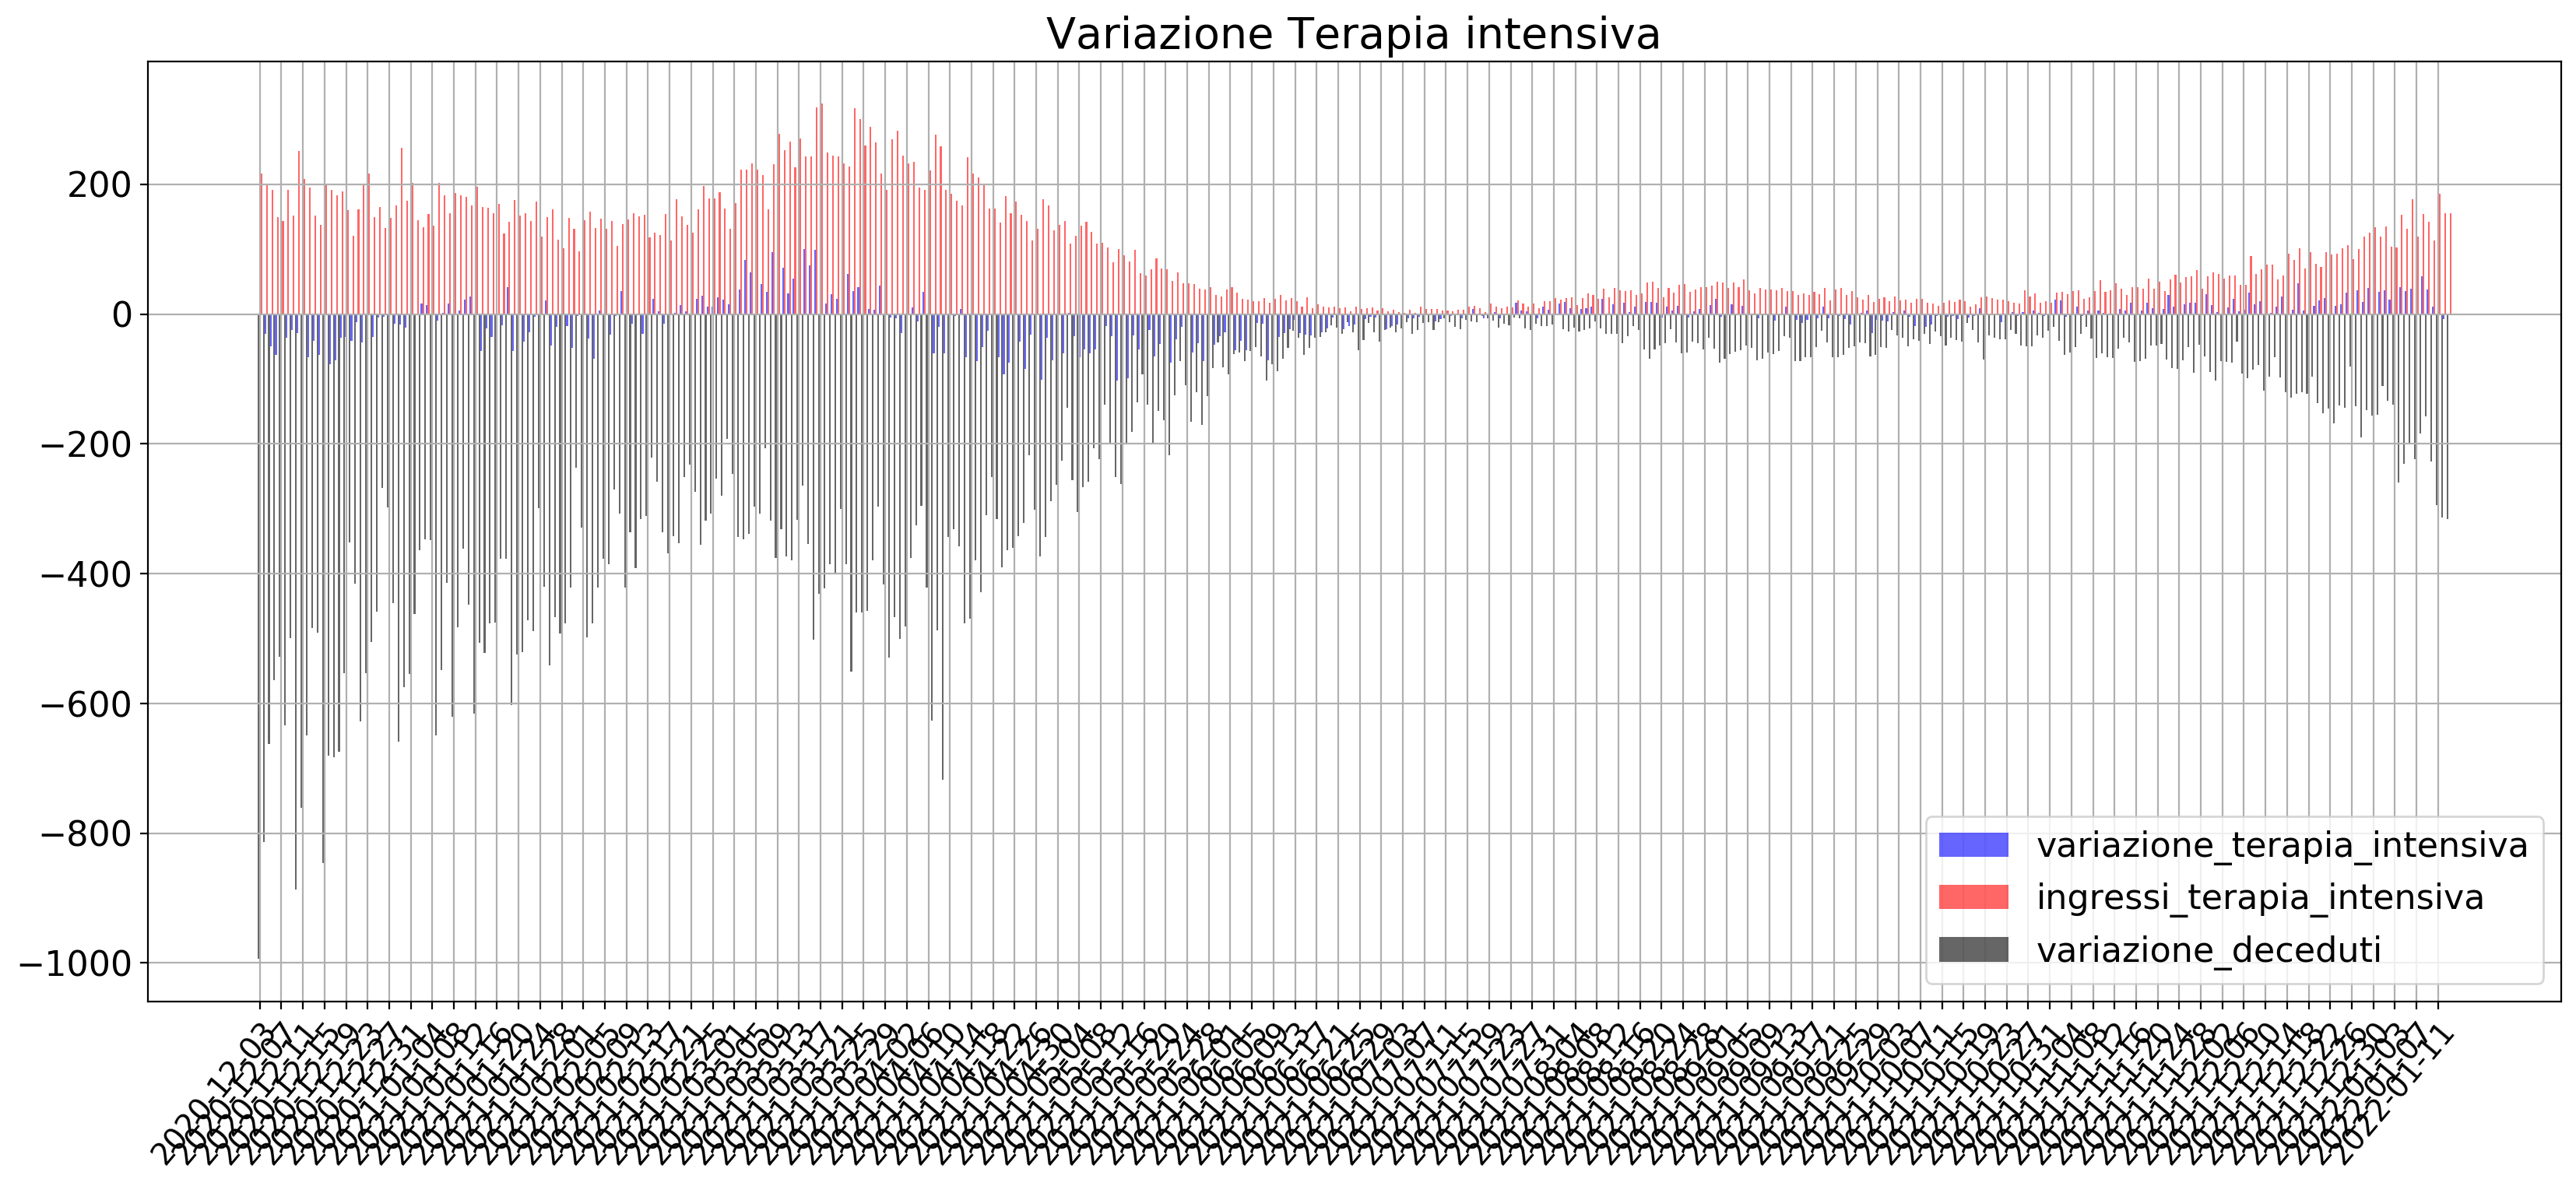

In [158]:
stakHist(df,
         {"variazione_terapia_intensiva":[0,"blue"],
          "ingressi_terapia_intensiva":[0.3,"red"],
          "variazione_deceduti":[-0.3,"black"]},
         "2020-12-03")

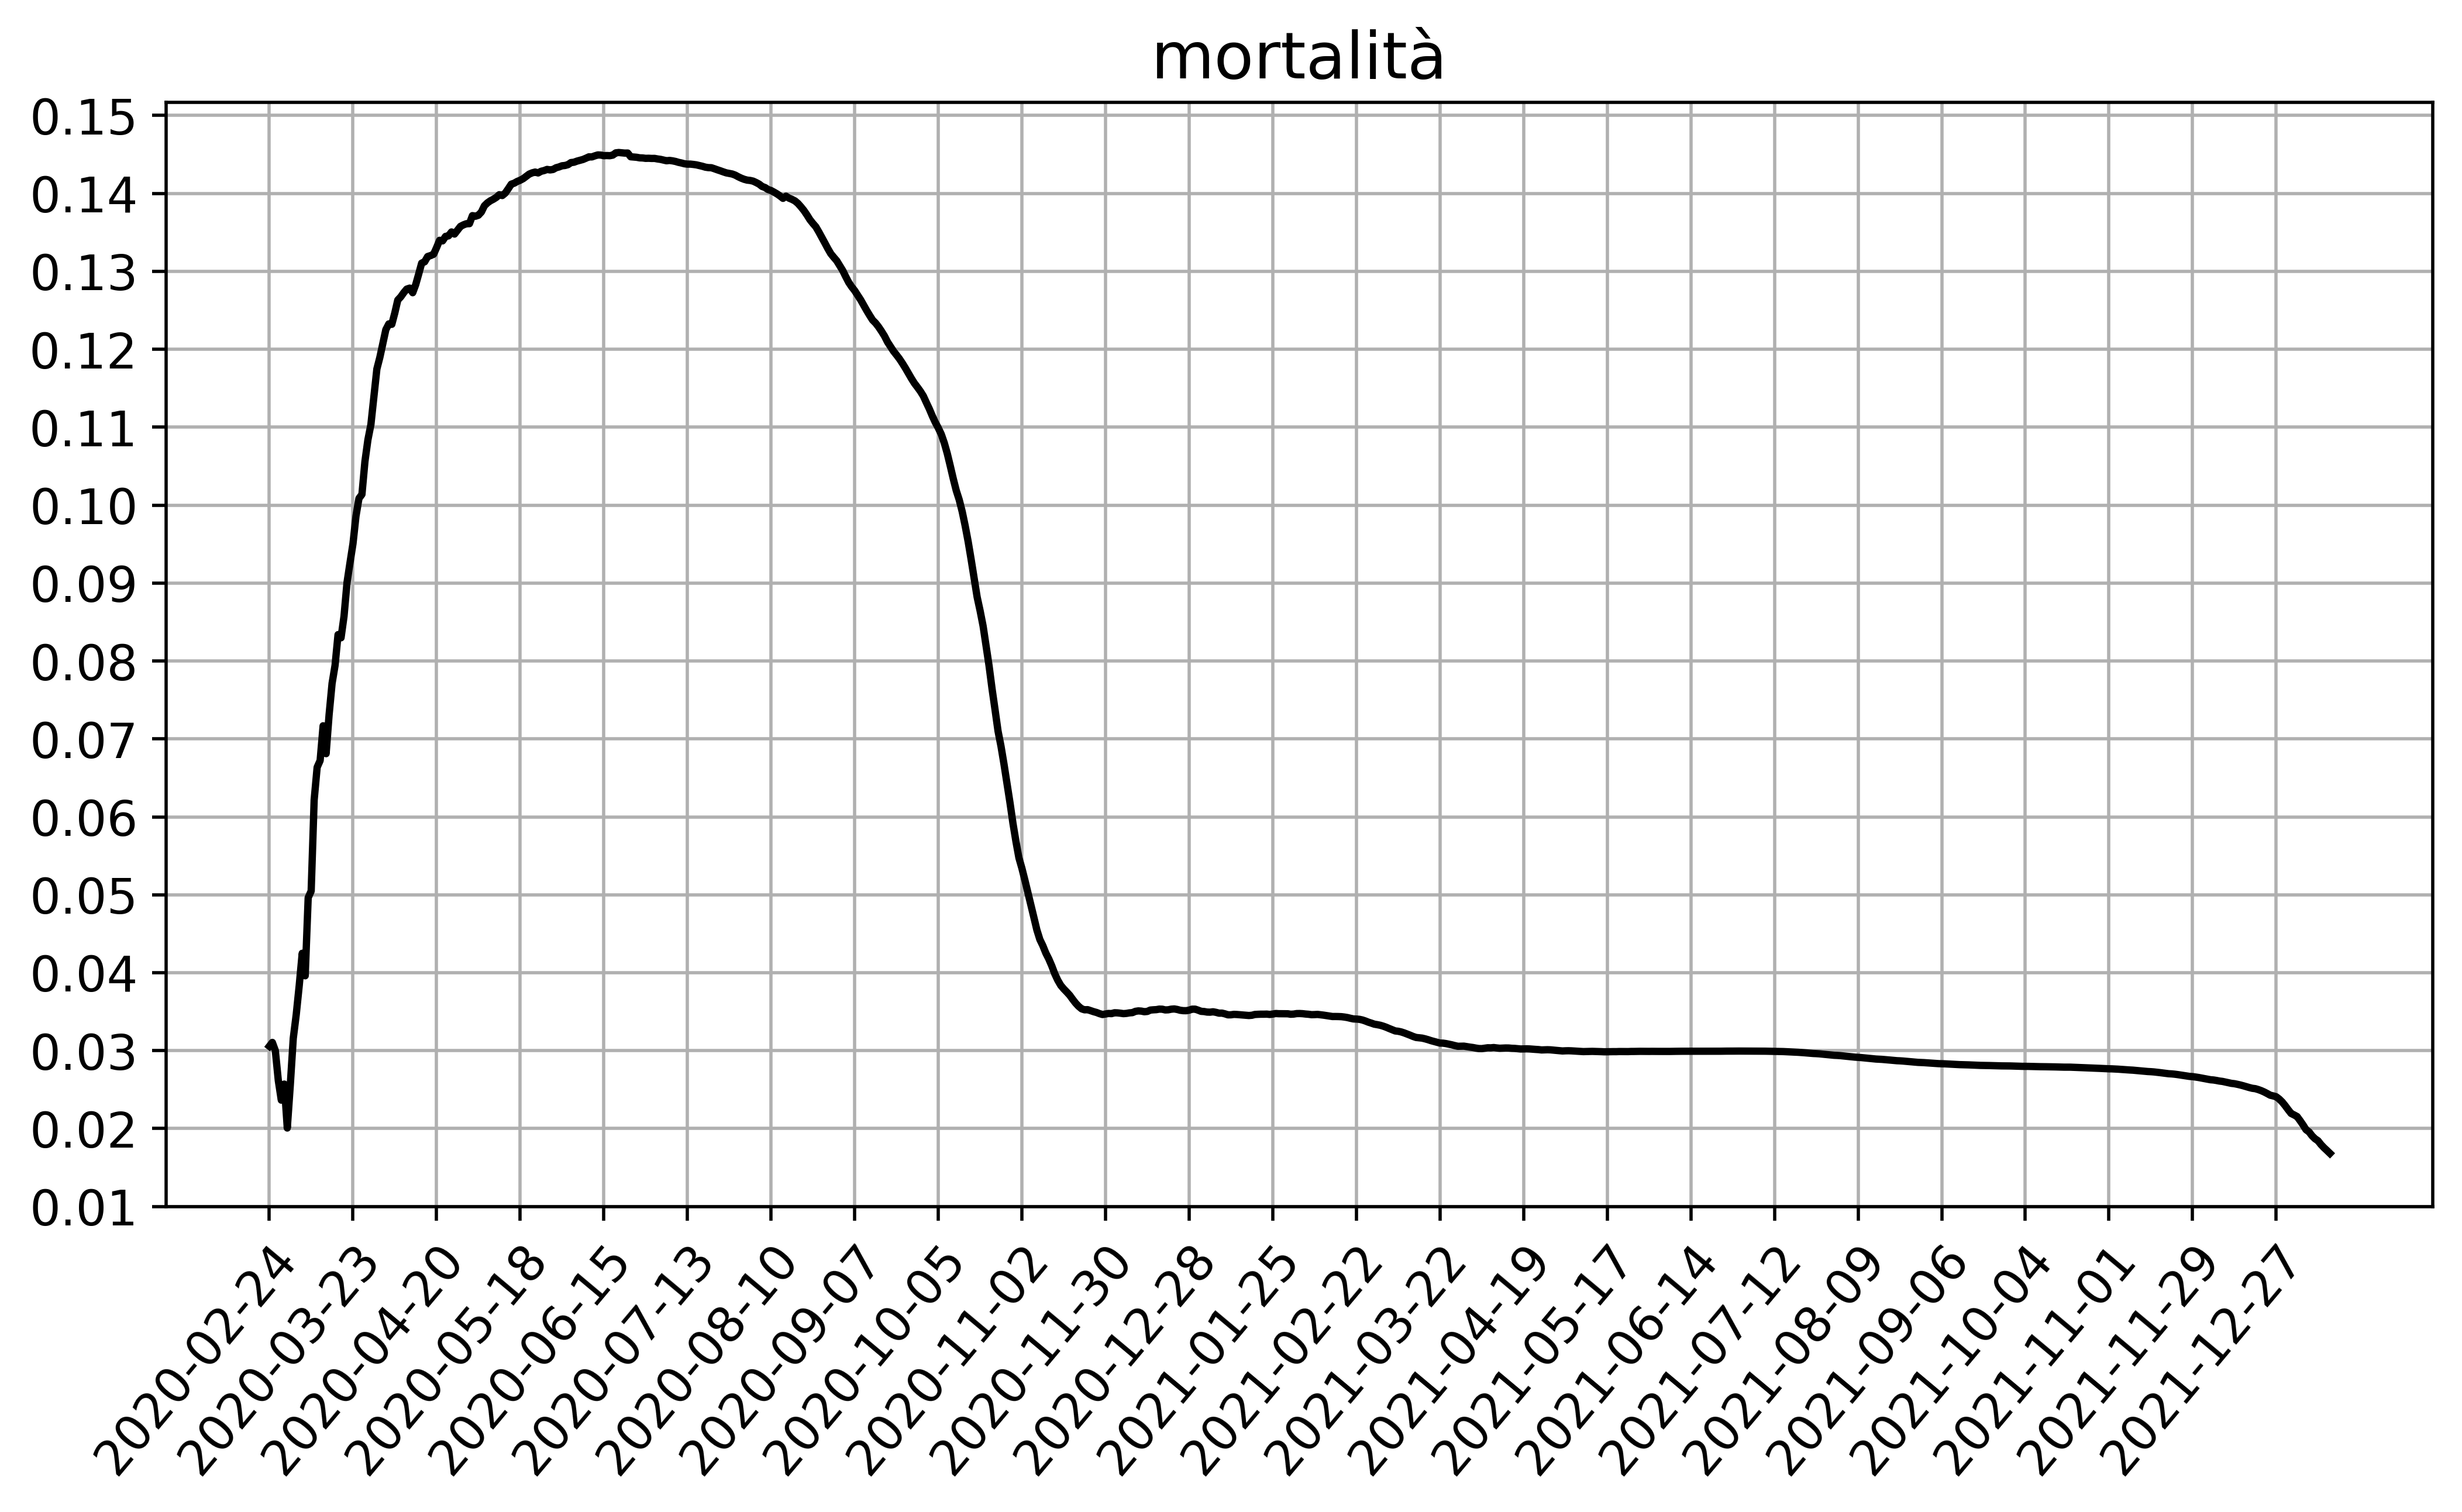

In [22]:
createXYPlot(df,
             y=["mortalità"],
             x="giorno",
             colors=["black","red"],
             days_interval=28,
             linewidth=1.8,
             dpis=500,
             plots_folder=plots_folder,
             yticks=np.arange(0.01,0.16,0.01),
             title="mortalità")

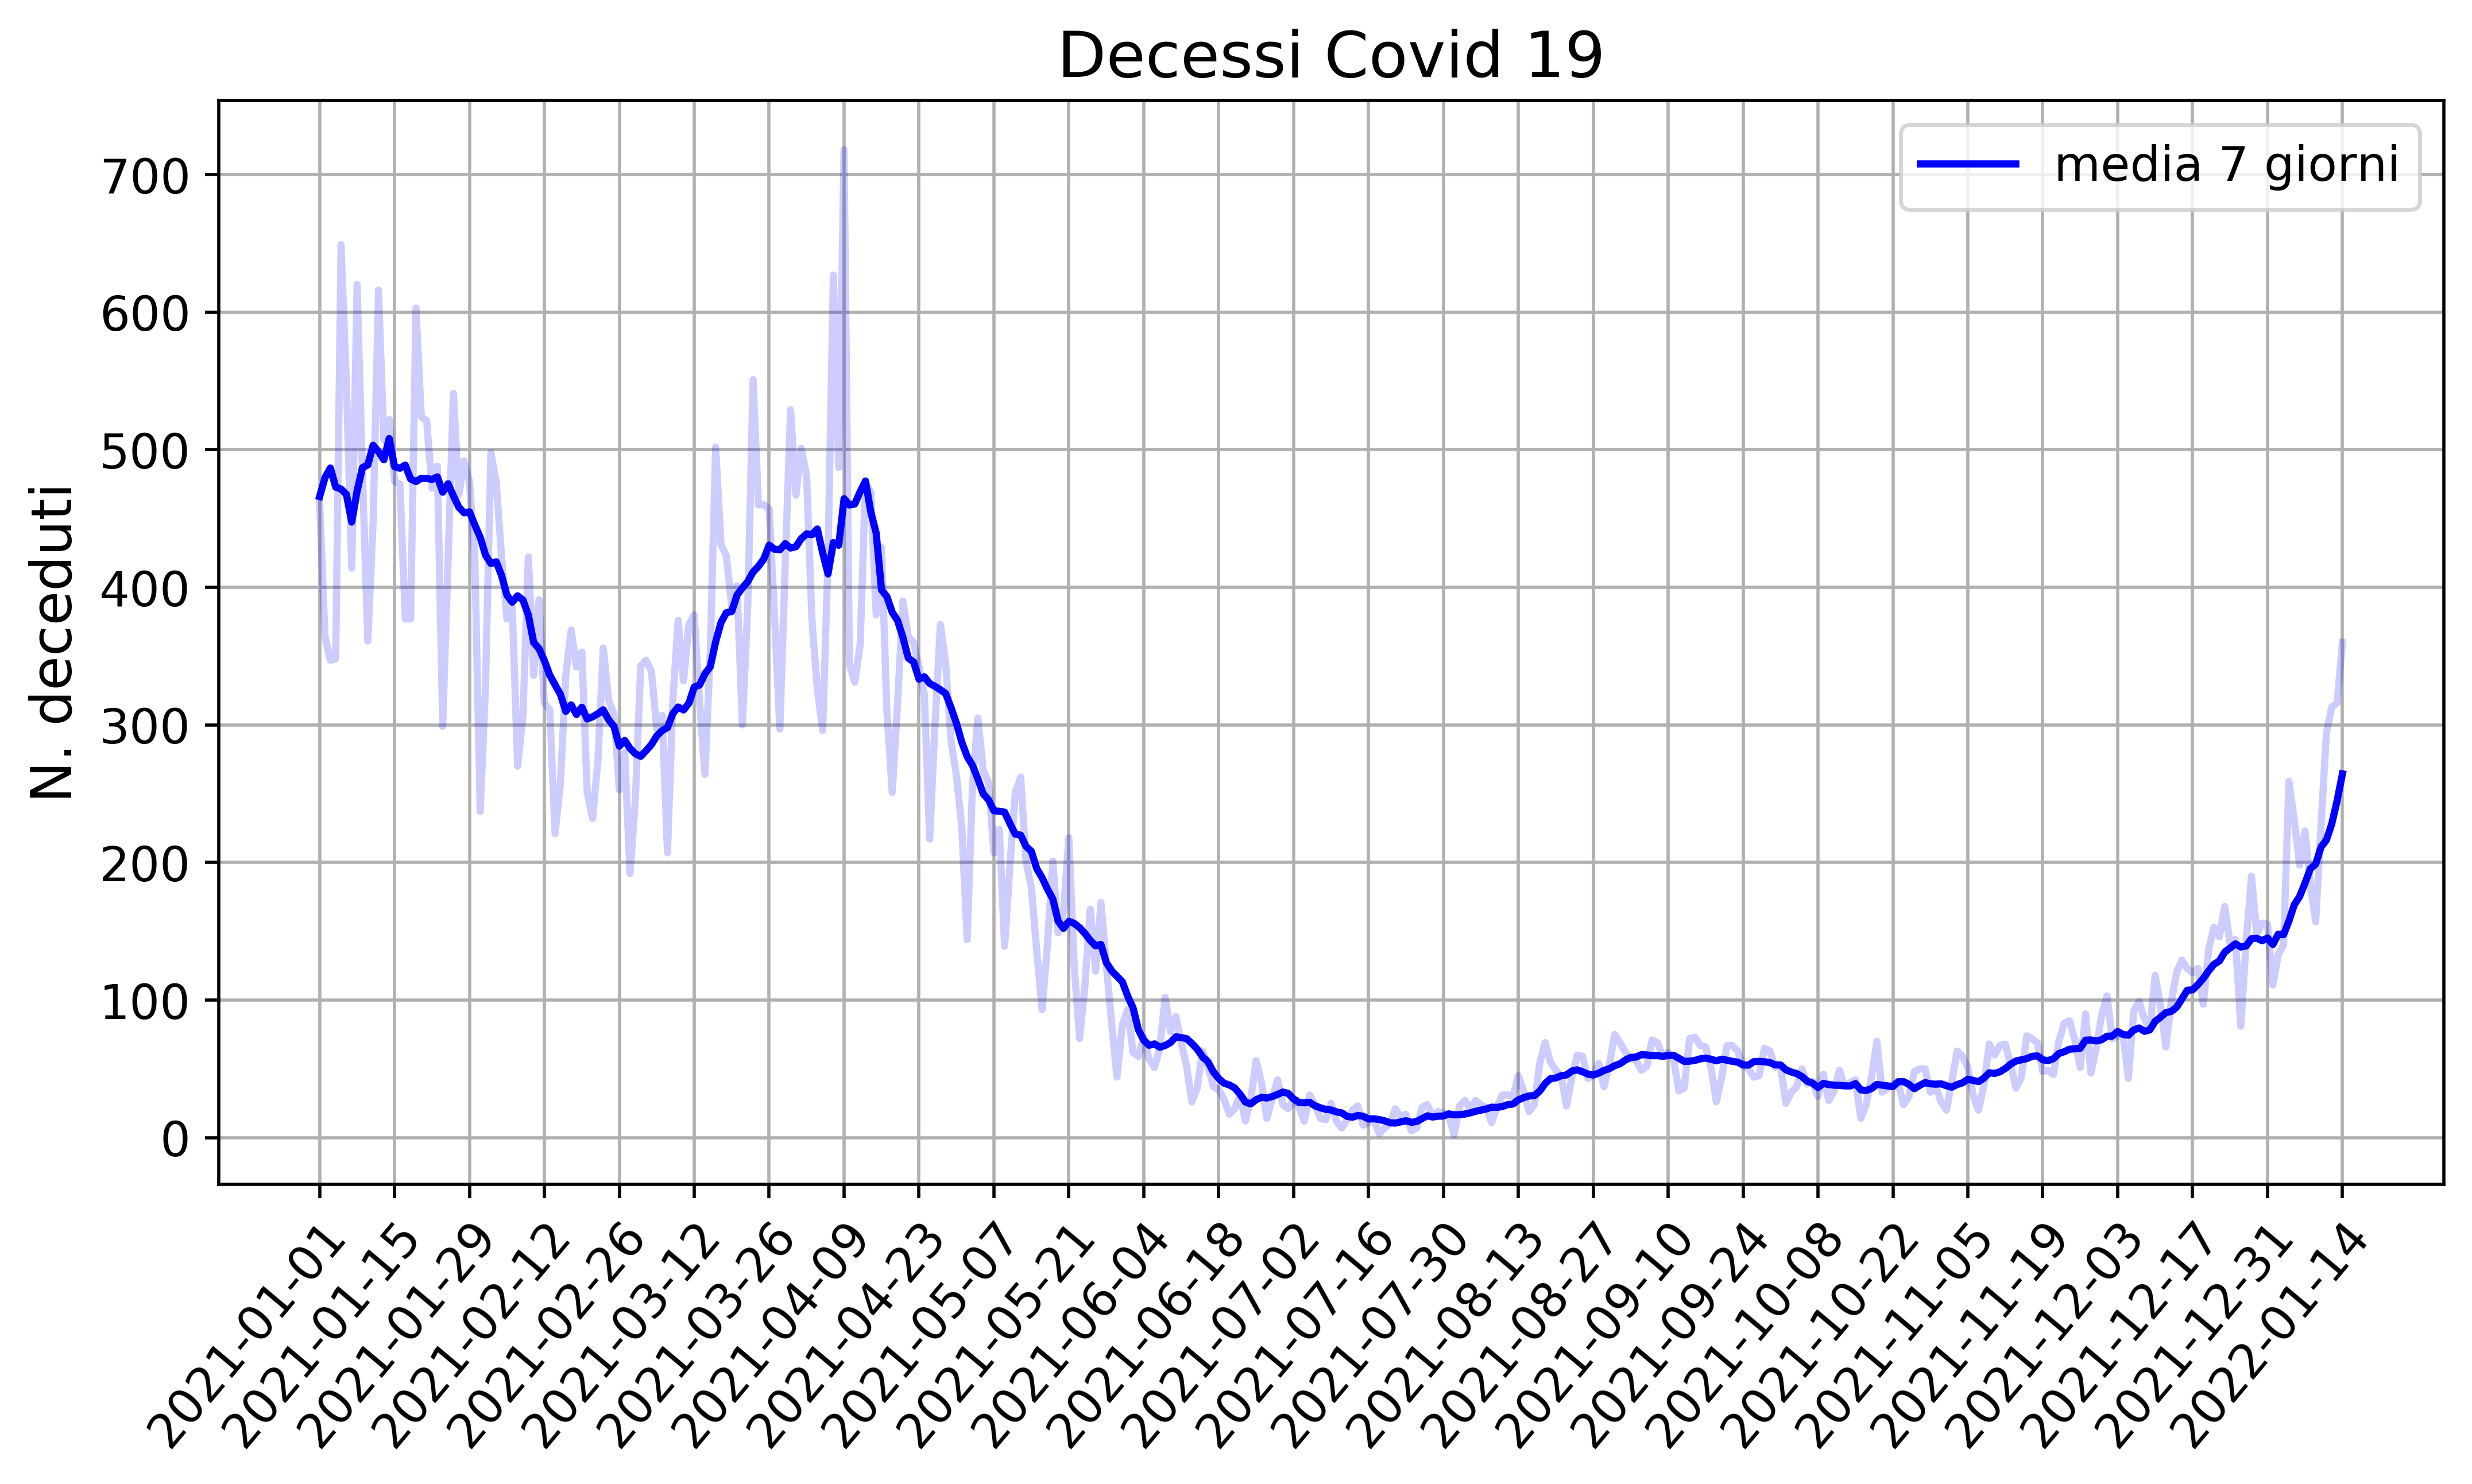

In [26]:
createXYPlot(df,
             y=["variazione_deceduti","variazione_deceduti_media_7"],
             labels=[None,"media 7 giorni"],
             x="giorno",
             ytitle="N. deceduti",
             colors=["b","b"],
             alphas=[0.2,1],
             days_interval = 14,
             dpis=500,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2020-12-31",
             title="Decessi Covid 19",
             savename="deceduti"
            )

In [83]:
df[["giorno","terapia_intensiva"]]

giorno  terapia_intensiva
0    2022-01-13               1668
1    2022-01-12               1669
2    2022-01-11               1677
3    2022-01-10               1606
4    2022-01-09               1595
5    2022-01-08               1557
6    2022-01-07               1499
7    2022-01-06               1467
8    2022-01-05               1428
9    2022-01-04               1392
10   2022-01-03               1351
11   2022-01-02               1319
12   2022-01-01               1297
13   2021-12-31               1260
14   2021-12-30               1226
15   2021-12-29               1185
16   2021-12-28               1145
17   2021-12-27               1126
18   2021-12-26               1089
19   2021-12-25               1071
20   2021-12-24               1038
21   2021-12-23               1023
22   2021-12-22               1010
23   2021-12-21               1012
24   2021-12-20                987
25   2021-12-19                966
26   2021-12-18                953
27   2021-12-17                923
28   2021-12-16                917
29   2021-12-15                870
30   2021-12-14                863
31   2021-12-13                856
32   2021-12-12                829
33   2021-12-11                818
34   2021-12-10                816
35   2021-12-09                811
36   2021-12-08                791
37   2021-12-07                776
38   2021-12-06                743
39   2021-12-05                736
40   2021-12-04                732
41   2021-12-03                708
42   2021-12-02                698
43   2021-12-01                686
44   2021-11-30                683
45   2021-11-29                669
46   2021-11-28                638
47   2021-11-27                624
48   2021-11-26                606
49   2021-11-25                588
50   2021-11-24                573
51   2021-11-23                560
52   2021-11-22                549
53   2021-11-21                520
54   2021-11-20                512
55   2021-11-19                512
56   2021-11-18                503
57   2021-11-17                486
58   2021-11-16                481
59   2021-11-15                475
60   2021-11-14                458
61   2021-11-13                453
62   2021-11-12                445
63   2021-11-11                422
64   2021-11-10                423
65   2021-11-09                421
66   2021-11-08                415
67   2021-11-07                398
68   2021-11-06                392
69   2021-11-05                395
70   2021-11-04                383
71   2021-11-03                381
72   2021-11-02                385
73   2021-11-01                364
74   2021-10-31                342
75   2021-10-30                346
76   2021-10-29                349
77   2021-10-28                347
78   2021-10-27                341
79   2021-10-26                341
80   2021-10-25                338
81   2021-10-24                341
82   2021-10-23                338
83   2021-10-22                343
84   2021-10-21                356
85   2021-10-20                355
86   2021-10-19                355
87   2021-10-18                358
88   2021-10-17                349
89   2021-10-16                352
90   2021-10-15                357
91   2021-10-14                359
92   2021-10-13                367
93   2021-10-12                370
94   2021-10-11                374
95   2021-10-10                364
96   2021-10-09                367
97   2021-10-08                383
98   2021-10-07                403
99   2021-10-06                415
100  2021-10-05                433
101  2021-10-04                437
102  2021-10-03                431
103  2021-10-02                432
104  2021-10-01                429
105  2021-09-30                440
106  2021-09-29                450
107  2021-09-28                459
108  2021-09-27                488
109  2021-09-26                483
110  2021-09-25                481
111  2021-09-24                489
112  2021-09-23                505
113  2021-09-22    

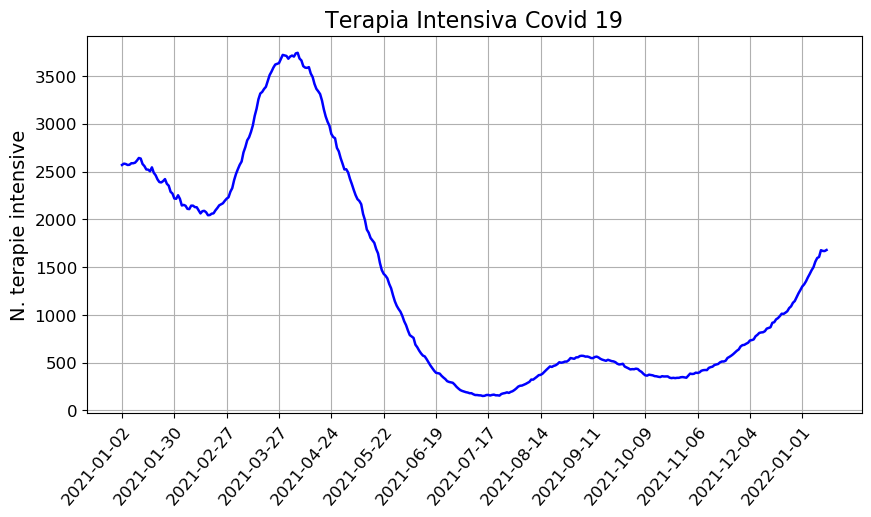

In [27]:
createXYPlot(df,
             y=["terapia_intensiva"],
             labels=["terapia intensiva"],
             x="giorno",
             ytitle="N. terapie intensive",
             colors=["b"],
             alphas=[1],
             days_interval=28,
             dpis=100,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2021-01-01",
             title="Terapia Intensiva Covid 19",
             savename="terapia_intensiva"
            )

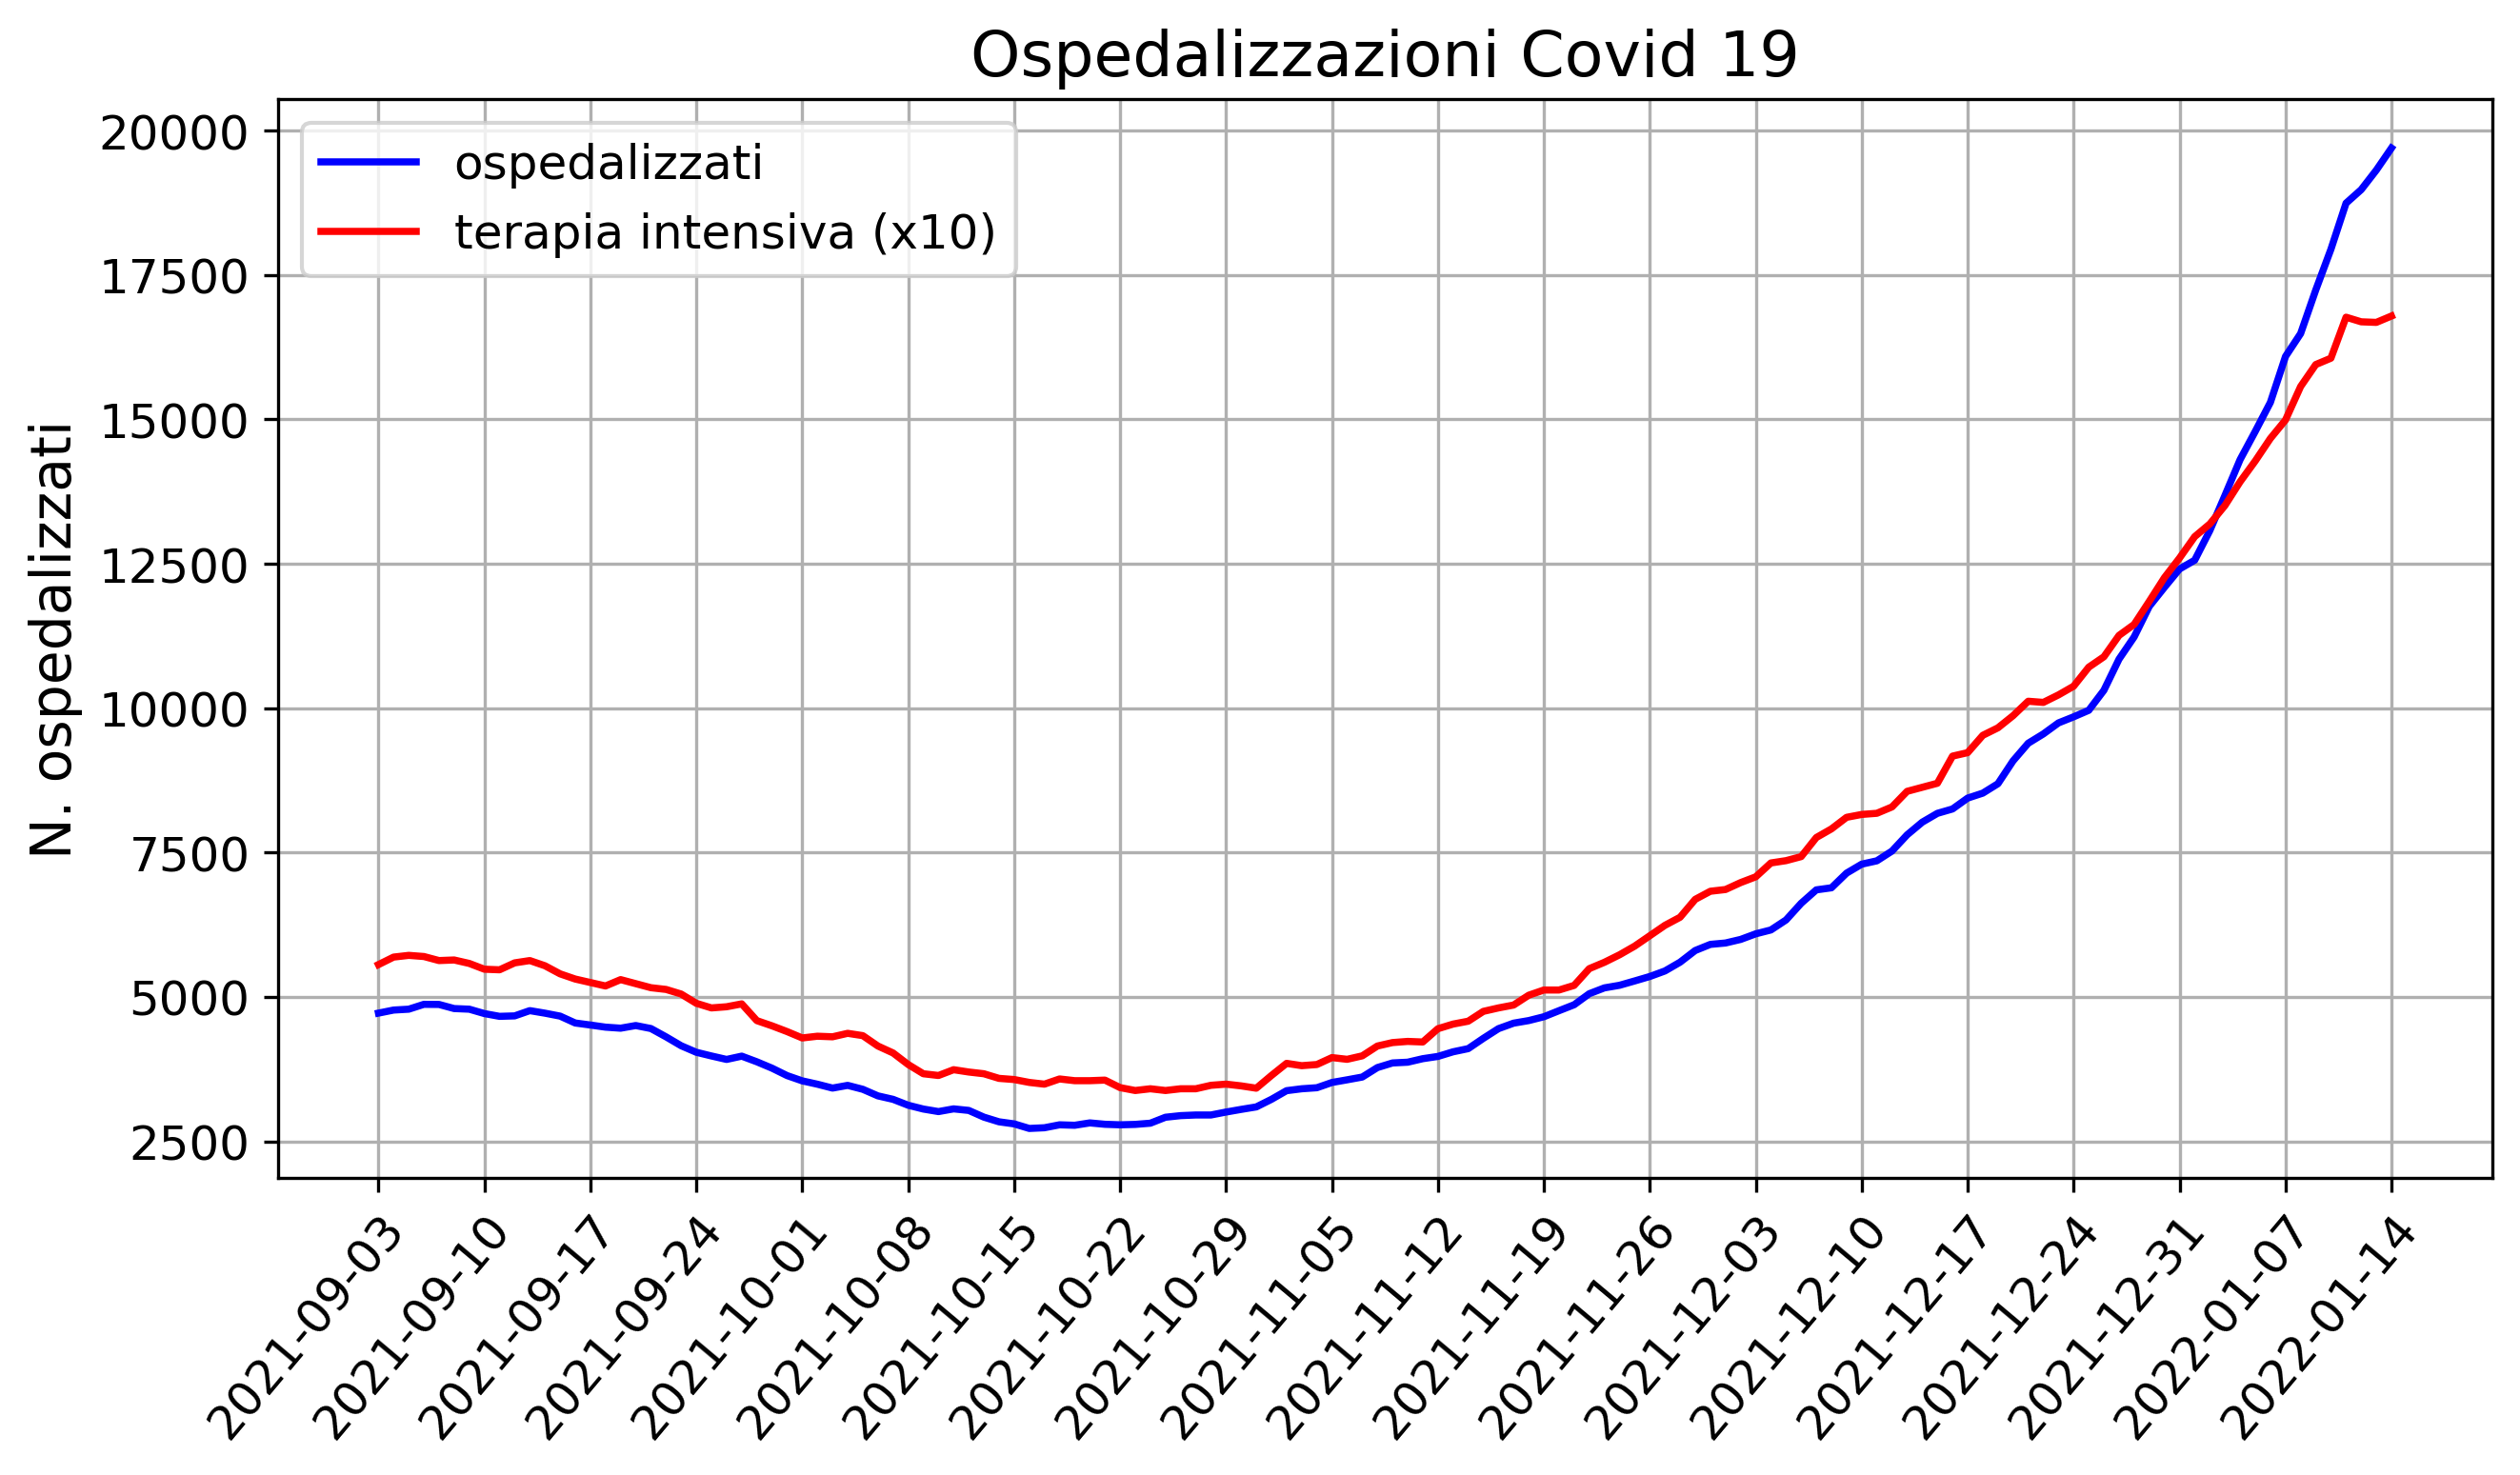

In [29]:
df["terapia_intensiva_x10"] = 10*df["terapia_intensiva"]
createXYPlot(df,
             y=["totale_ospedalizzati", "terapia_intensiva_x10"],
             labels=["ospedalizzati", "terapia intensiva (x10)"],
             x="giorno",
             ytitle="N. ospedalizzati",
             colors=["b","r"],
             alphas=[1,1],
             days_interval = 7,
             dpis=300,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2021-09-02",
             title="Ospedalizzazioni Covid 19",
             savename="ospedalizzazioni_ti",
             yscale="linear"
            )

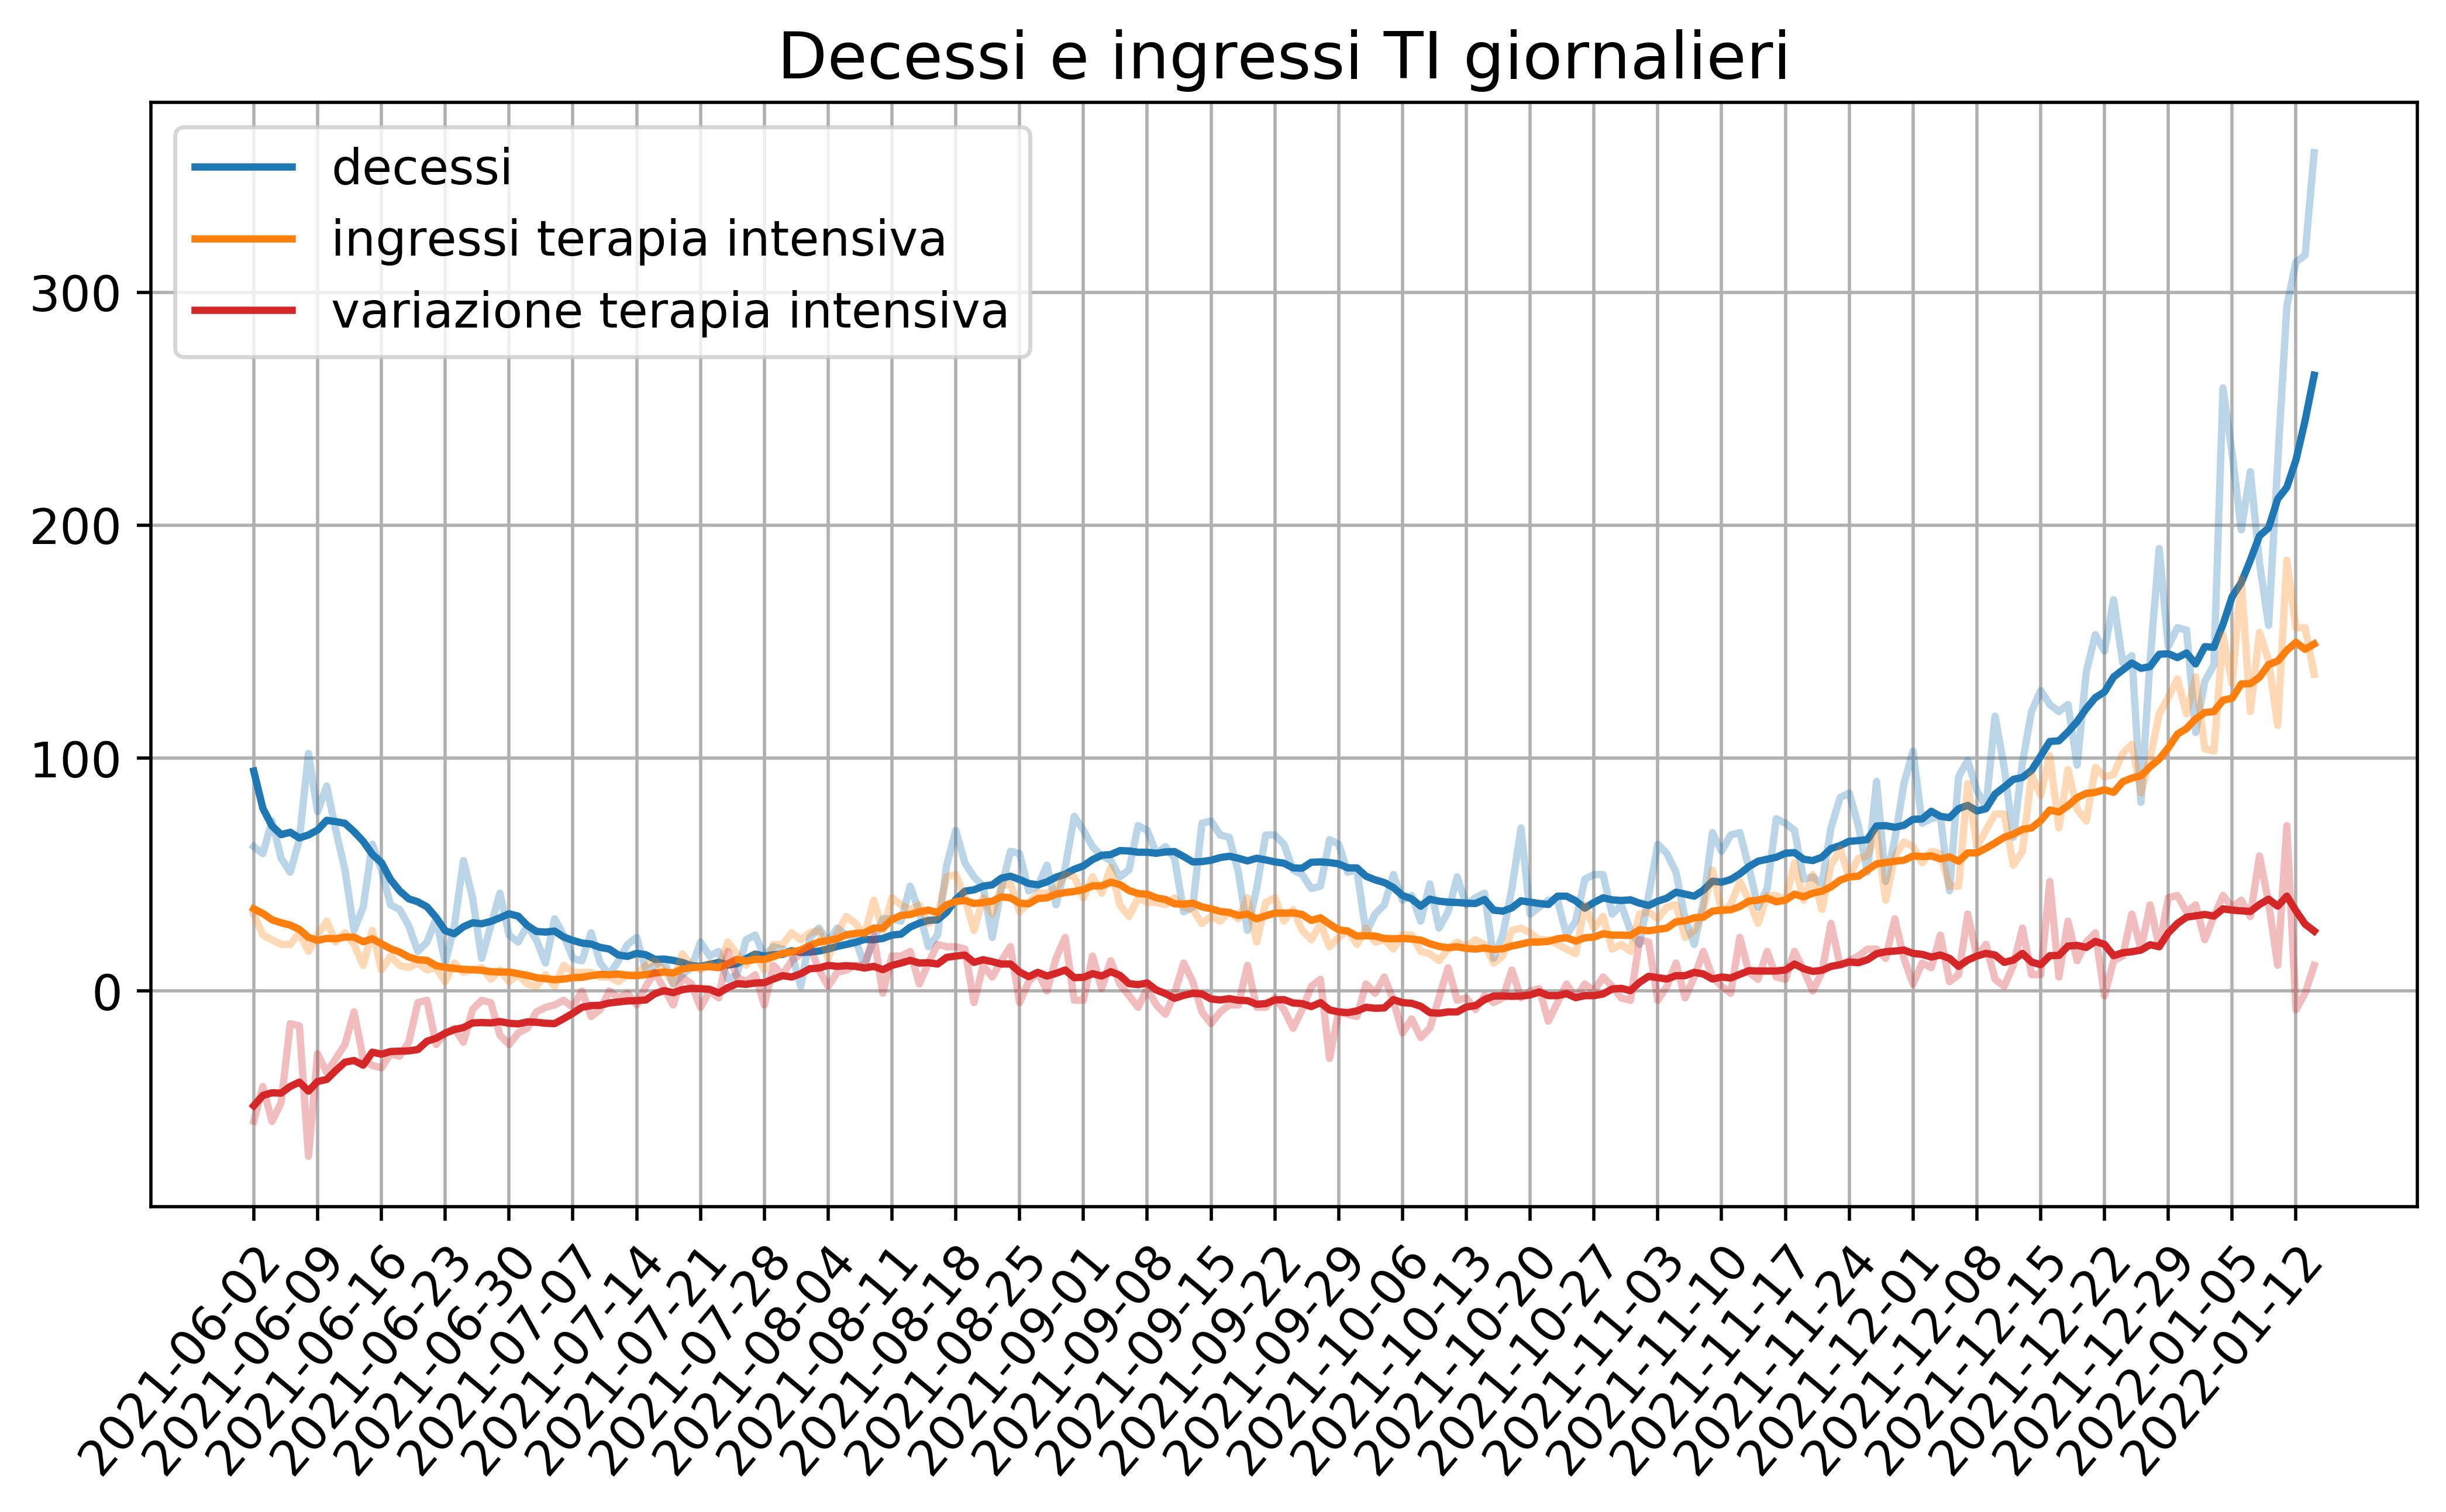

In [30]:
createXYPlot(df,
             y=["variazione_deceduti",
                "variazione_deceduti_media_7",
                "ingressi_terapia_intensiva",
                "ingressi_terapia_intensiva_media_7",
                "variazione_terapia_intensiva",
                "variazione_terapia_intensiva_media_7",
               ],
             x="giorno",
             ytitle="",
             alphas=[0.3,1,0.3,1,0.3,1],
             colors=[colors[0],colors[0],colors[1],colors[1],colors[3],colors[3]],
             labels=[
                 None,"decessi",
                 None,"ingressi terapia intensiva",
                 None,"variazione terapia intensiva"
             ],
             days_interval = 7,
             dpis=500,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2021-06-01",
             title="Decessi e ingressi TI giornalieri",
             savename="deceduti_ingressi_ti.png")

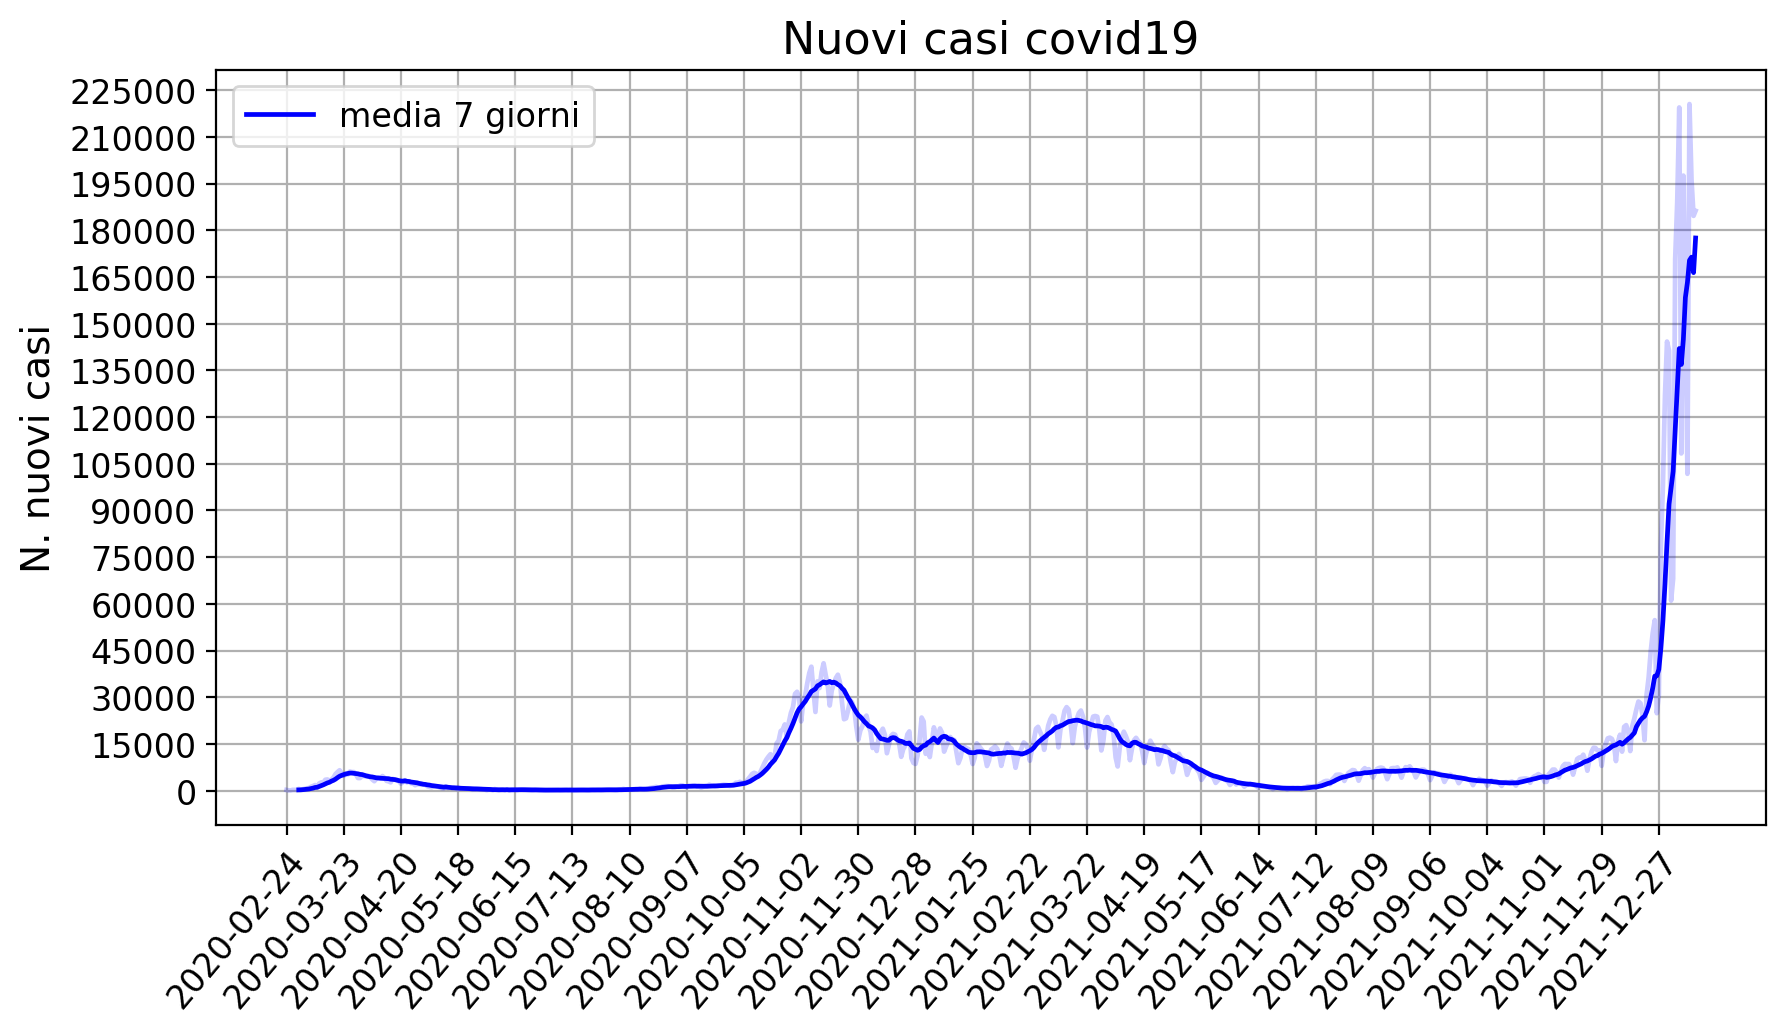

In [31]:
createXYPlot(df,
             y=["nuovi_positivi","nuovi_positivi_media_7"],
             labels=[None,"media 7 giorni"],
             x="giorno",
             ytitle="N. nuovi casi",
             alphas=[0.2,1],
             colors=["b","b"],
             days_interval = 28,
             dpis=200,
             plots_folder=plots_folder,
             linewidth=1.7,
             yticks=np.arange(0,230000,15000),
             start_date="2020-01-01",
             title="Nuovi casi covid19",
             savename="nuovi_positivi.png",
            )

In [32]:
z_value = 1.645
df1 = (df[["data","deceduti","totale_casi","giorno", "totale_ospedalizzati"]]
       .groupby(df["data"].dt.strftime("%m-%y"))
       .head(1).reset_index().drop(columns=["index"]))


df1["deceduti_mese"] = df1["deceduti"] - df1["deceduti"].shift(-1) 
df1["deceduti_mese"] = df1.deceduti_mese.combine_first(df1.deceduti)  

df1["casi_mese"] = df1["totale_casi"] - df1["totale_casi"].shift(-1) 
df1["casi_mese"] = df1.casi_mese.combine_first(df1.totale_casi)                                     

df1["letalità_mese"]=np.round(100*df1["deceduti_mese"]/df1["casi_mese"],2)
df1["tasso_ospedalizzazione_mese"]=np.round(100*df1["totale_ospedalizzati"]/df1["casi_mese"],2)

df1=df1.sort_values(by=["data"])
df1["data_plot"] = df1["data"].dt.strftime("%B-%Y")

df1["sd_letalità_mese"] = z_value*np.round(100*np.sqrt(df1["letalità_mese"])/np.sqrt(df1["casi_mese"]),2)
df1["sd_tasso_ospedalizzazione_mese"] = z_value*np.round(100*np.sqrt(df1["tasso_ospedalizzazione_mese"])/np.sqrt(df1["casi_mese"]),2)

df1["letalità_up_err"] = df1["sd_letalità_mese"]
df1["letalità_lo_err"] = np.where(df1['sd_letalità_mese'] > df1['letalità_mese'],df1['letalità_mese'], df1['sd_letalità_mese'])

df1["tasso_ospedalizzazione_up_err"] = df1["sd_tasso_ospedalizzazione_mese"]
df1["tasso_ospedalizzazione_lo_err"] = np.where(df1['sd_tasso_ospedalizzazione_mese'] > df1['tasso_ospedalizzazione_mese'],df1['tasso_ospedalizzazione_mese'], df1['sd_tasso_ospedalizzazione_mese'])

df1["year"] = df1["data"].dt.strftime("%Y")
df1["month"] = df1["data"].dt.strftime("%B")
df1["month_num"] = df1["data"].dt.strftime("%m").astype(int)



df1_2020 = df1[df1.year=='2020'].set_index("month_num")
df1_2021 = df1[df1.year=='2021'].set_index("month_num")
df1_2020_2021 = df1_2020.join(df1_2021,lsuffix="_2020",rsuffix="_2021",how="outer").reset_index()

import calendar
month_dict={i:list(calendar.month_name)[i] for i in range(1,13)}
print(month_dict)

df1_2020_2021["month"]=df1_2020_2021["month_num"].replace(month_dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [33]:
def get_montly_plot(x):
    asymmetric_error = [df1[f"{x}_lo_err"],df1[f"{x}_up_err"]]

    max_val = int(np.max(df1[f"{x}_mese"])) + int(np.max(df1[f"{x}_up_err"]))
    fig,ax=plt.subplots(dpi=200,figsize=(11,5))
    plt.bar(df1["data_plot"],df1[f"{x}_mese"],alpha=0.8)
    plt.errorbar(x=df1["data_plot"],y=df1[f"{x}_mese"],
             yerr=asymmetric_error,
             fmt='o',color="black",lolims=0,
            linewidth=0.8,capsize=3,markersize=3)
    for i, v in enumerate(df1[f"{x}_mese"]):
        ax.text(i+0.1, v+0.2, f"{np.round(v,2)}%", horizontalalignment="left",rotation=40)
    plt.grid()
    _=plt.yticks(np.arange(0,max_val,5),fontsize=12)
    plt.ylabel(f"{x} [%]".replace("_"," "),fontsize=15)
    _=plt.xticks(rotation=60, fontsize=12,
             rotation_mode="anchor", 
           verticalalignment = "top",
           horizontalalignment = "right")
    pltpath=f"./plots/{oggi}/{x}_mese.png"
    plt.title(f"{x} COVID-19 per mese".replace("_"," "),fontsize=16)
    plt.savefig(pltpath,bbox_inches="tight")

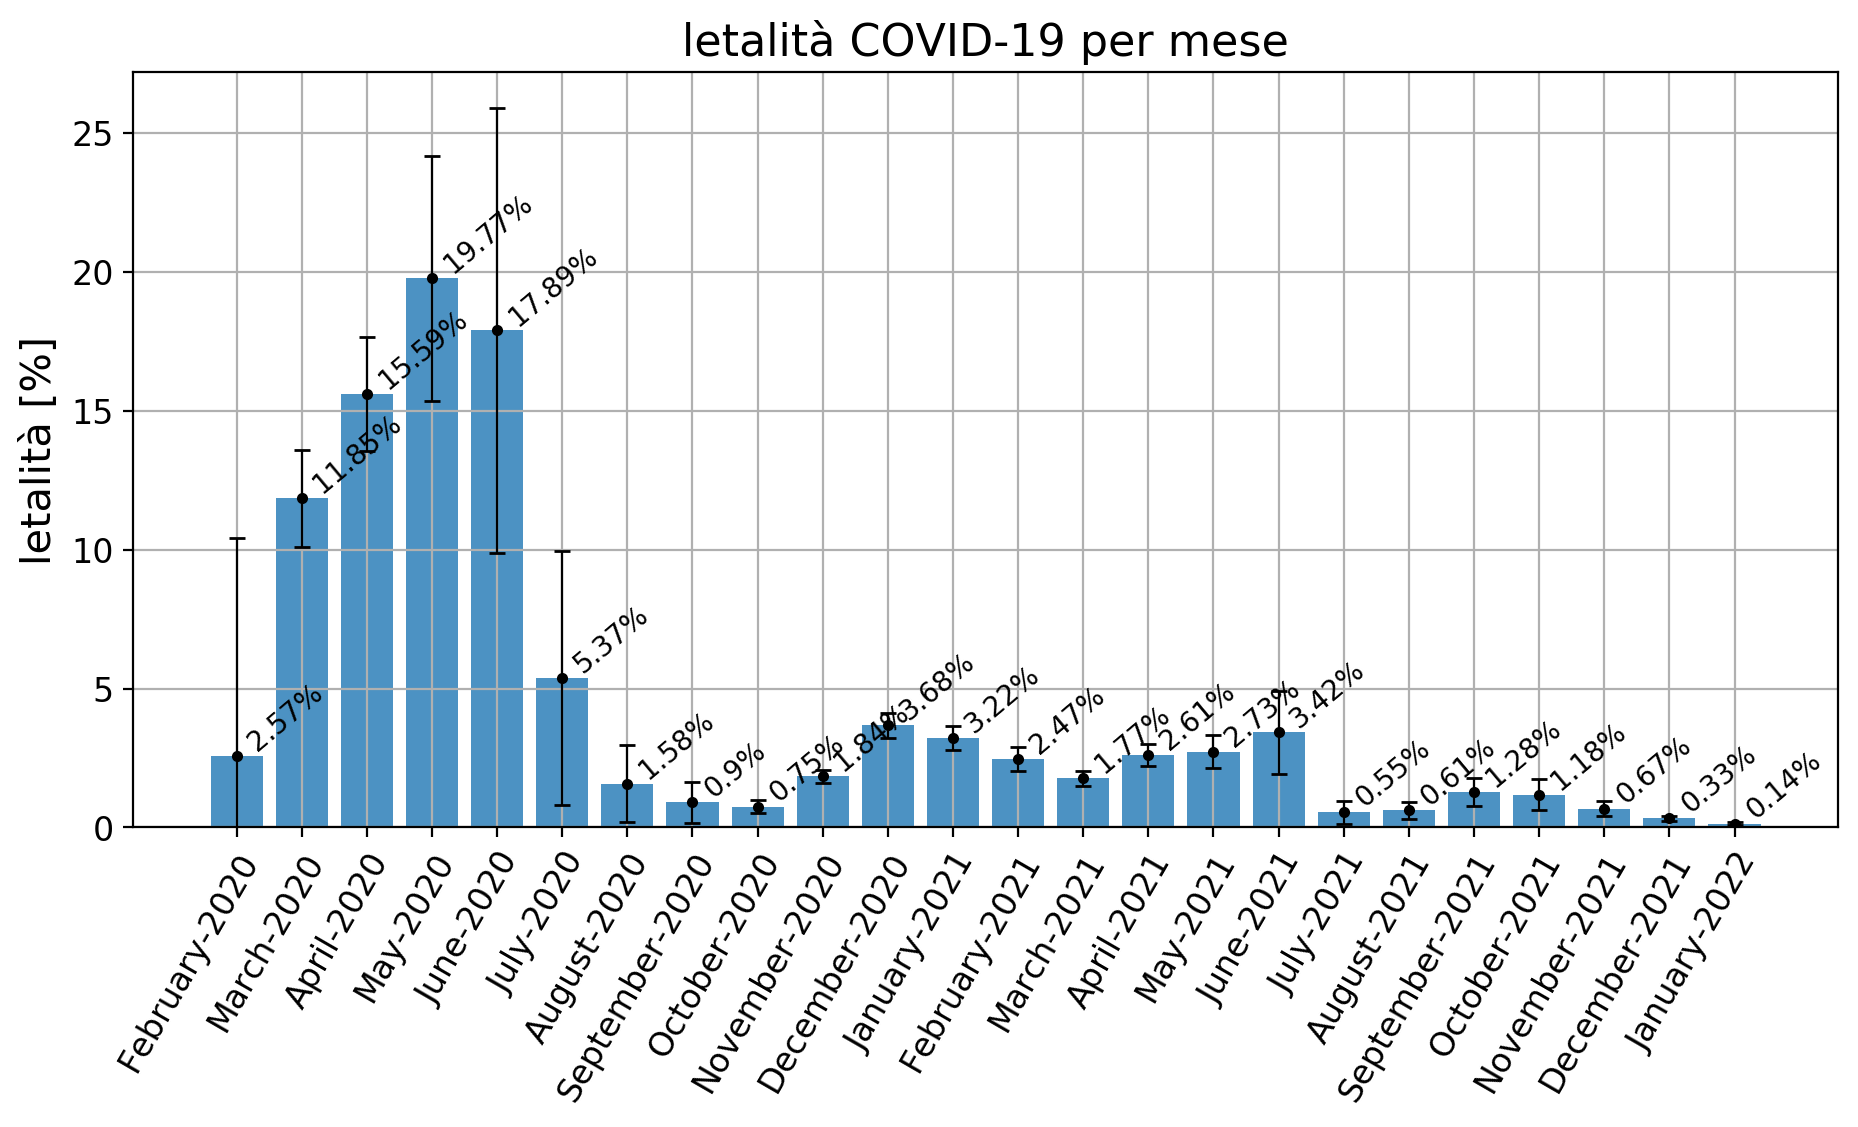

In [34]:
get_montly_plot(x="letalità")

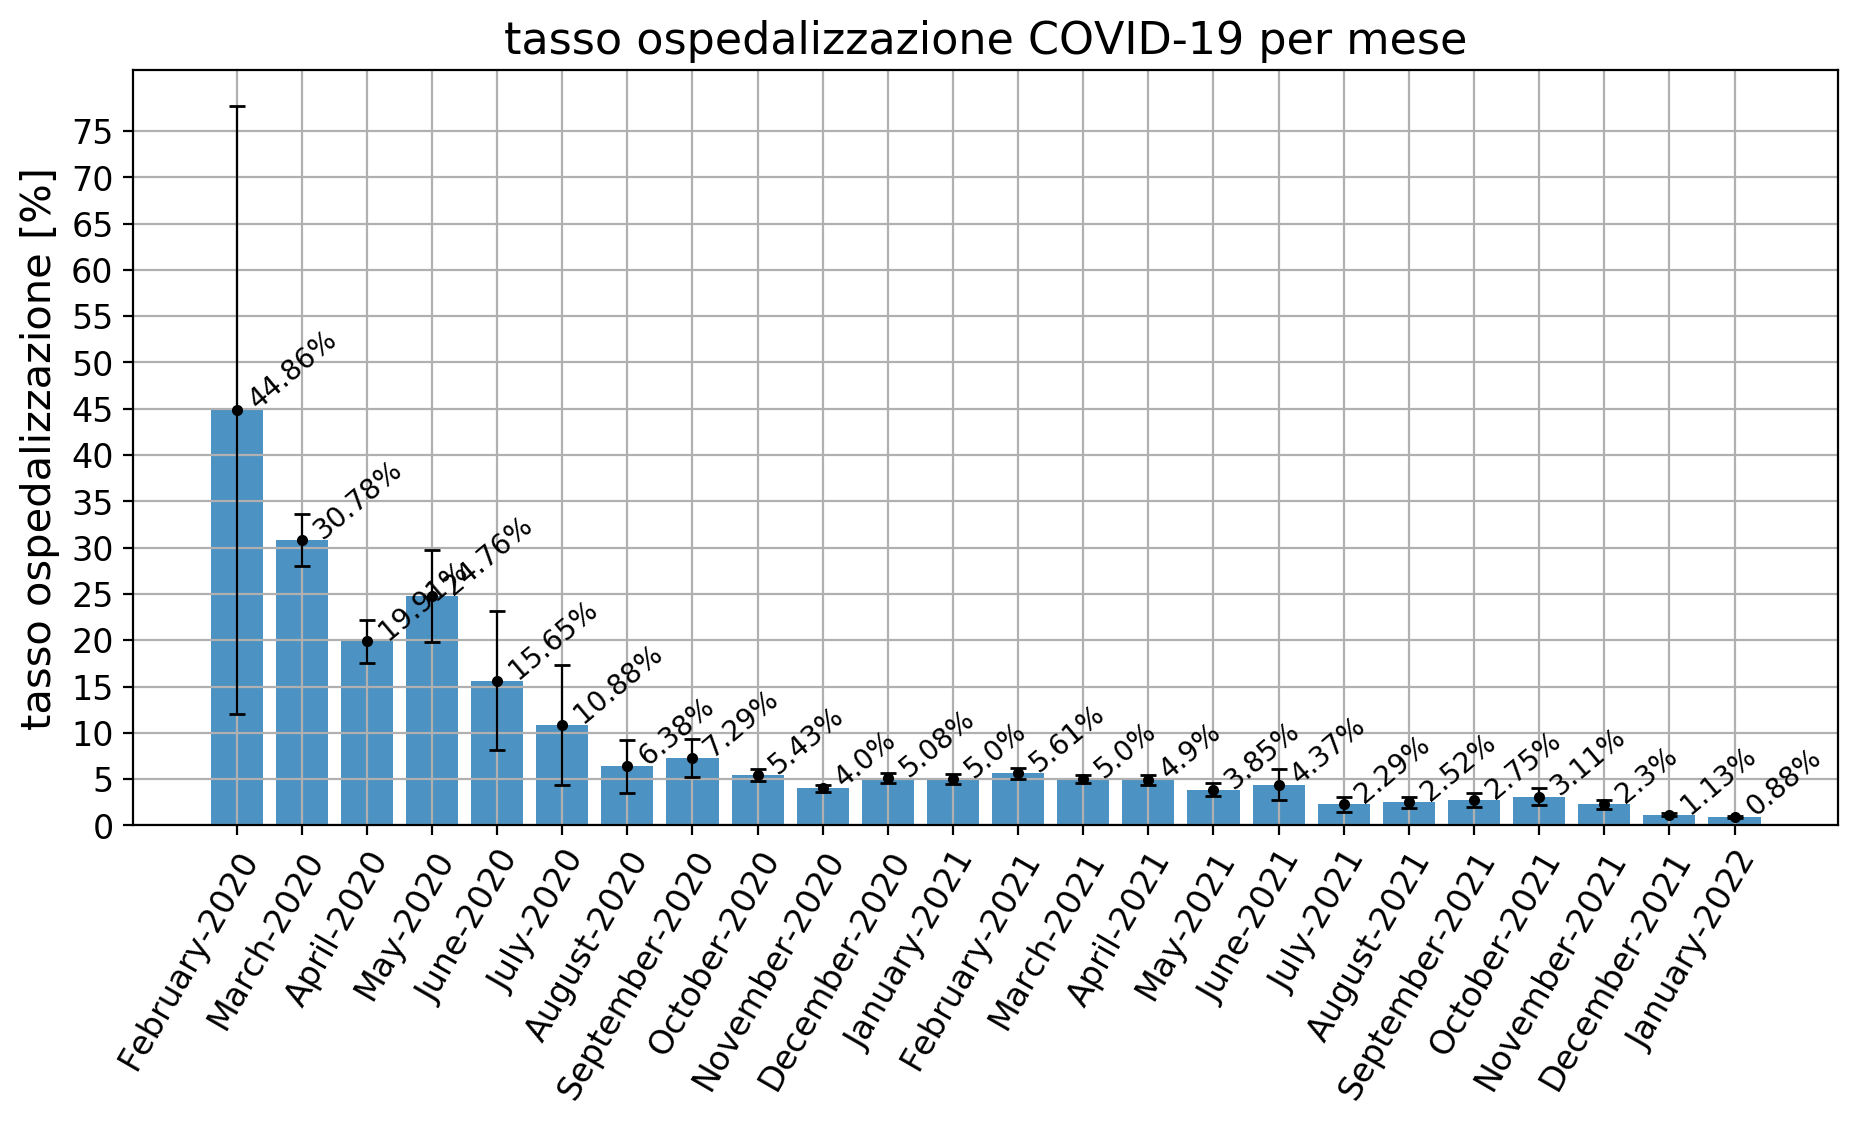

In [35]:
get_montly_plot(x="tasso_ospedalizzazione")

In [36]:
def get_range(n):
    if n % 2 == 0:
        r_plus = list(np.arange(n/2+1))
        r_plus.remove(0)
        r_minus = sorted([-x for x in r_plus])
        return r_minus + r_plus
    else: 
        r_plus = list(np.arange(n/2+1))
        r_minus = sorted([-x for x in r_plus])
        return sorted(list(set(r_minus + r_plus)))

In [37]:
def make_hist_comp(x):
    fig, ax = plt.subplots(figsize=(12,5),dpi=100)
    width=0.4
    
    years = [x.split("_")[1] for x in df1_2020_2021.columns if "year" in x]
    steps = get_range(len(years))
    for i in range(0,len(years)):
        asymmetric_error = [df1_2020_2021[f"{x}_lo_err_{years[i]}"],df1_2020_2021[f"{x}_up_err_{years[i]}"]]
        plt.bar(df1_2020_2021.month_num + steps[i]*(width/2), 
                df1_2020_2021[f"{x}_mese_{years[i]}"],
                alpha=0.8,align="center",width=width, label=years[i])
        plt.errorbar(x=df1_2020_2021.month_num + steps[i]*(width/2),
                     y=df1_2020_2021[f"{x}_mese_{years[i]}"],
                     yerr=asymmetric_error,
                     fmt='o',color="black",lolims=0,
                     linewidth=0.8,capsize=3,markersize=3)
    plt.legend(fontsize=13)
    _ = plt.xticks(list(np.arange(1,13,1)),
                   rotation=60, fontsize=13,
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right")
    _ = ax.set_xticklabels(df1_2020_2021.month.values)
    _ = plt.yticks(fontsize=13)
    plt.title(x.replace("_"," "),fontsize=18)
    plt.ylabel("[%]",fontsize=14)
    plt.grid()
    pltpath=f"./plots/{oggi}/year_comp_{x}.png"
    plt.savefig(pltpath,bbox_inches="tight")

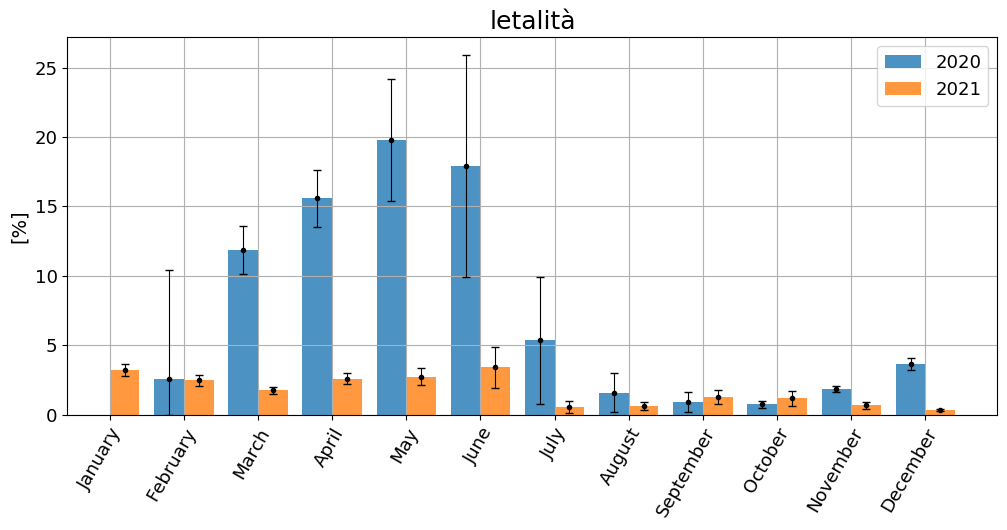

In [38]:
make_hist_comp("letalità")

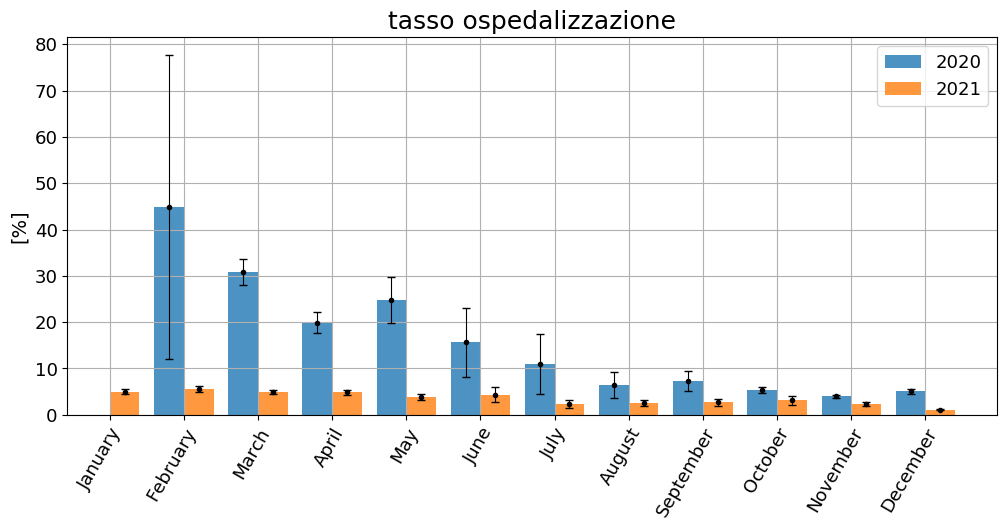

In [39]:
make_hist_comp("tasso_ospedalizzazione")

### Confronto anni

In [40]:
df_anno = df[["data",
              "variazione_deceduti",
              "terapia_intensiva",
              "variazione_deceduti_media_7",
              "totale_ospedalizzati",
              "variazione_tamponi",
              "variazione_tamponi_media_7",
              "nuovi_positivi",    
              "nuovi_positivi_media_7",
              "totale_positivi",
              "tasso_positivi",
              "tasso_positivi_media_7"
             ]]

df_anno["anno"] = pd.DatetimeIndex(df_anno['data']).year
df_anno["giorno"] = df_anno['data'].dt.dayofyear
df_anno["settimana"] = df_anno['data'].dt.weekofyear

/Users/acastelli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [41]:
df_dict = {}
years = [2020,2021,2022]
for year in years:
    df_dict[year] = df_anno[df_anno.anno == year].sort_values(by="giorno").reset_index()

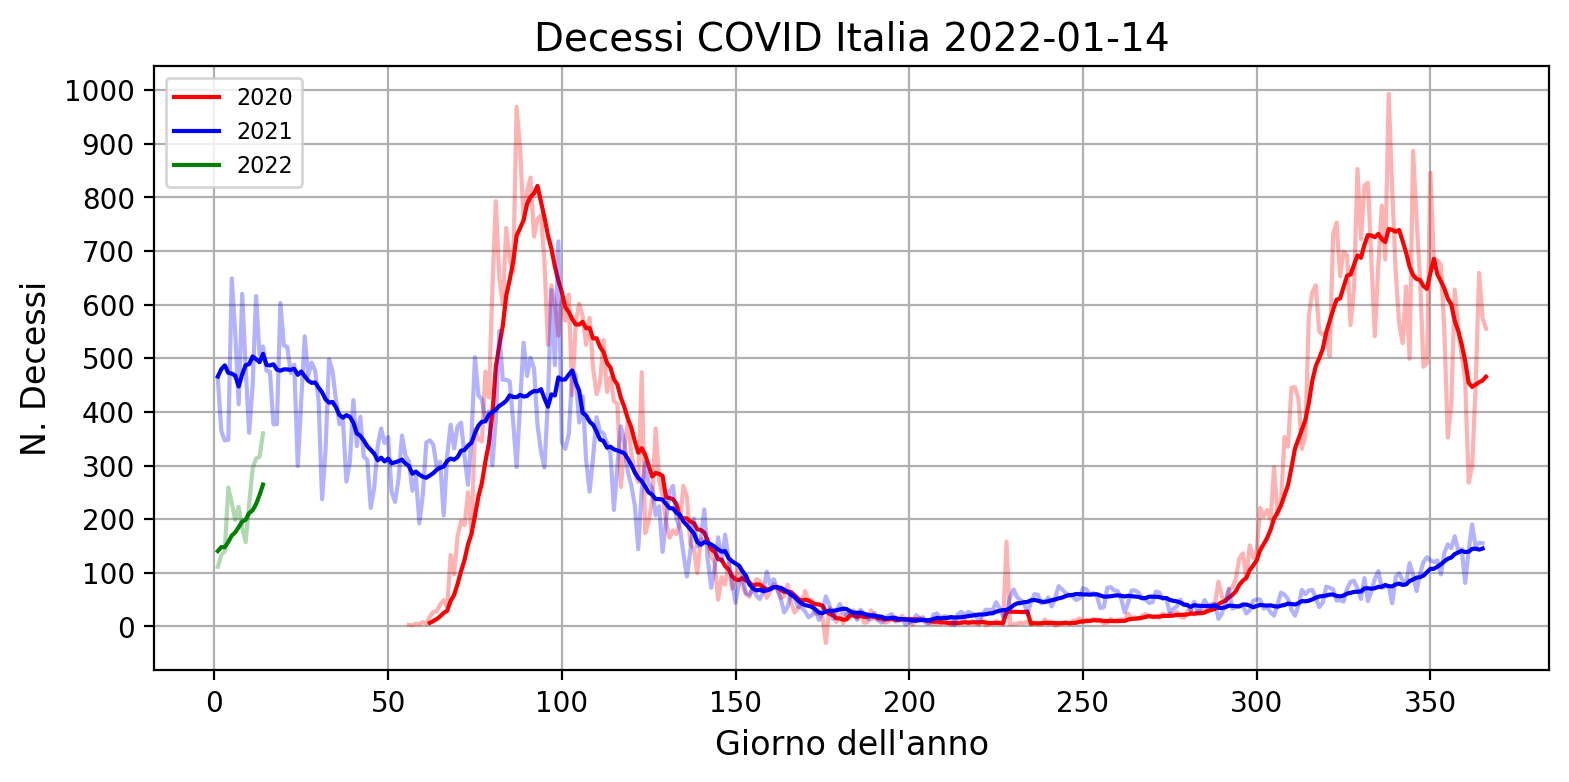

In [42]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"],df_dict[year]["variazione_deceduti"],alpha=0.3,color=colors[i])
    plt.plot(df_dict[year]["giorno"],df_dict[year]["variazione_deceduti_media_7"],label=year,alpha=1,color=colors[i])
    i+=1
    
plt.grid()
plt.title(f"Decessi COVID Italia {oggi}",fontsize=14)
plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. Decessi",fontsize=12)
plt.yticks(np.arange(0,1100,100))
plt.legend(fontsize=8)
plt.savefig(f"./plots/{oggi}/year_comp_decessi.png",bbox_inches="tight")

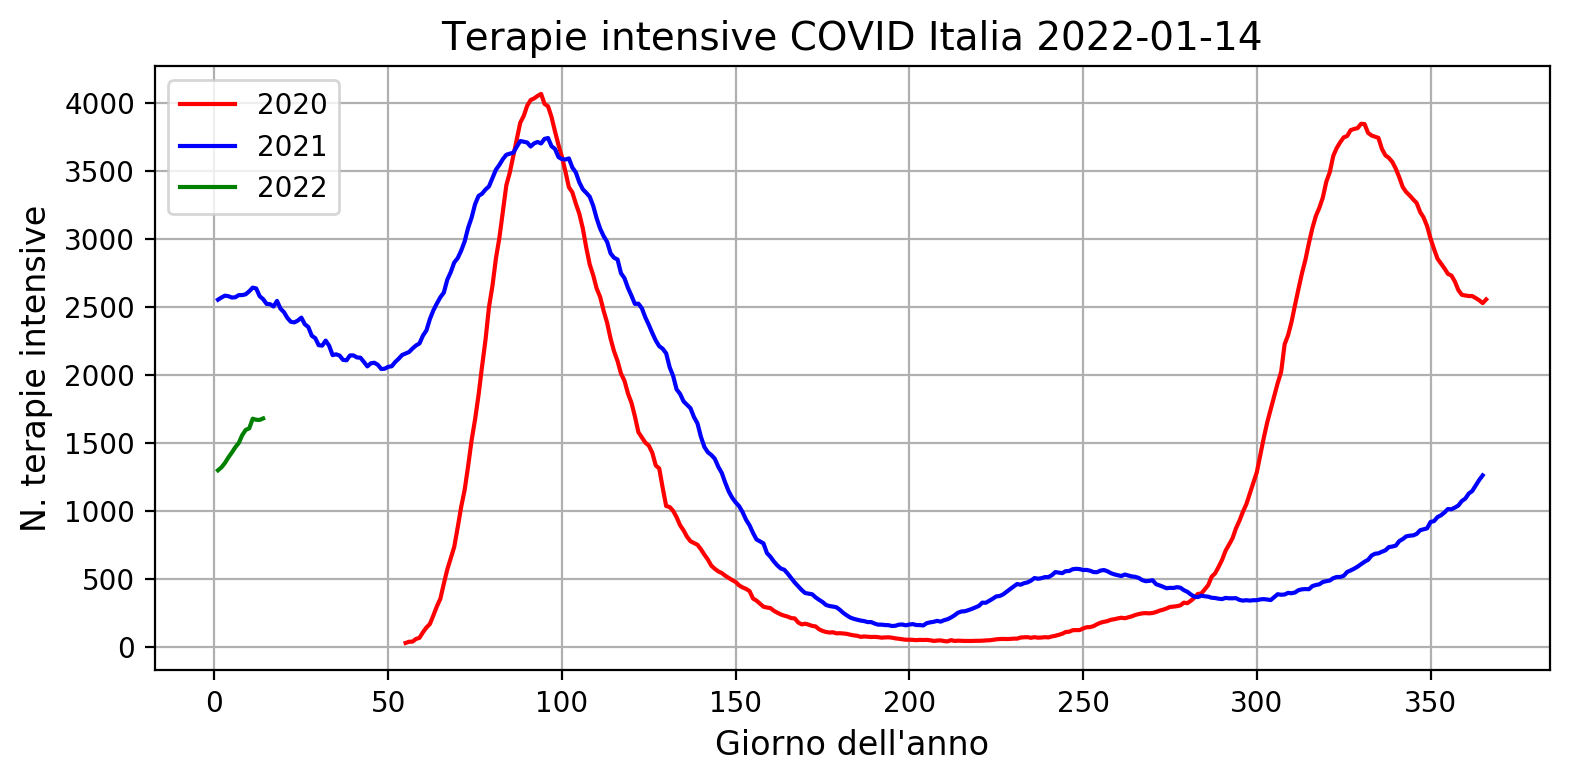

In [43]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"], df_dict[year]["terapia_intensiva"], alpha=1, color=colors[i], label=year)
    i+=1
plt.grid()
plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. terapie intensive",fontsize=12)
plt.title(f"Terapie intensive COVID Italia {oggi}",fontsize=14)
plt.legend()
plt.savefig(f"./plots/{oggi}/year_comp_ti.png",bbox_inches="tight")

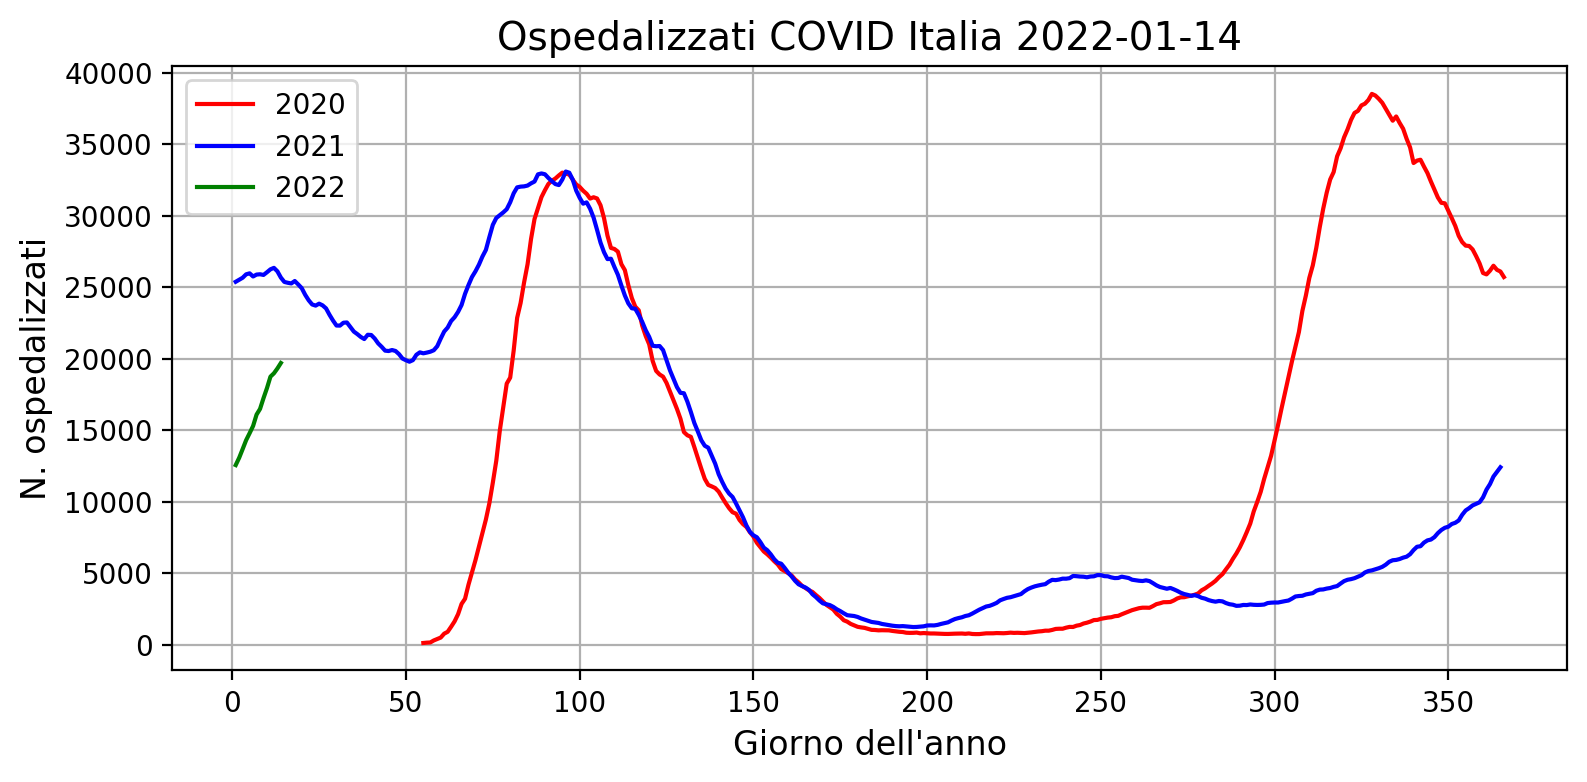

In [44]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"], df_dict[year]["totale_ospedalizzati"], alpha=1, color=colors[i], label=year)
    i+=1
plt.grid()
plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. ospedalizzati",fontsize=12)
plt.title(f"Ospedalizzati COVID Italia {oggi}",fontsize=14)
plt.legend()
plt.savefig(f"./plots/{oggi}/year_comp_hospit.png",bbox_inches="tight")

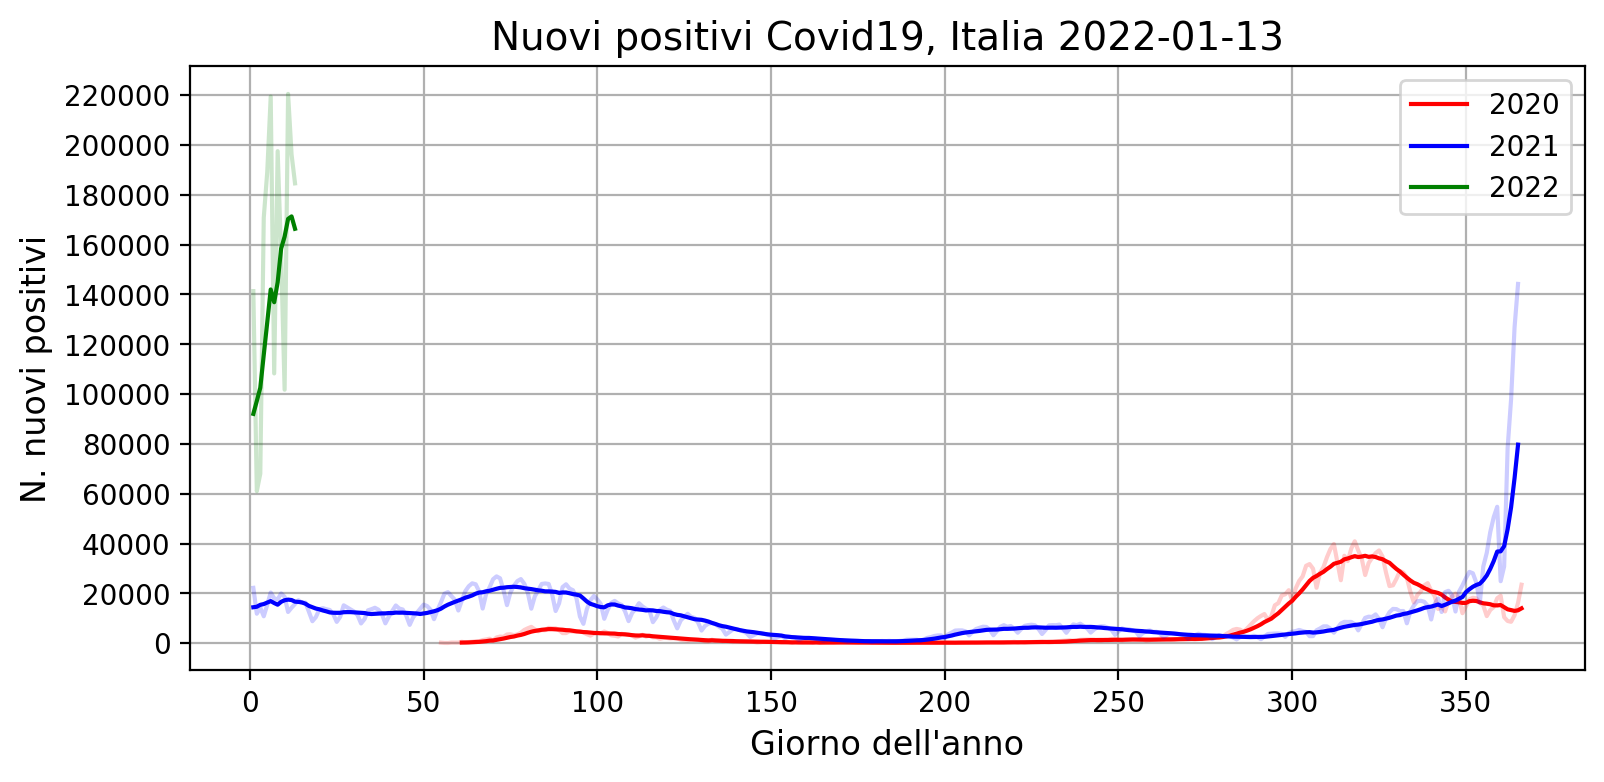

In [113]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"], df_dict[year]["nuovi_positivi"], alpha=0.2, color=colors[i], label=None)
    plt.plot(df_dict[year]["giorno"], df_dict[year]["nuovi_positivi_media_7"], alpha=1, color=colors[i], label=year)
    i+=1
plt.grid()
plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. nuovi positivi",fontsize=12)
plt.yticks(np.arange(0,240000,20000))
plt.title(f"Nuovi positivi Covid19, Italia {oggi}", fontsize=14)
plt.legend()
plt.savefig(f"./plots/{oggi}/year_comp_nuovi_positivi.png", bbox_inches="tight")

In [103]:
df[df["nuovi_positivi"]==np.max(df["nuovi_positivi"])][["giorno","nuovi_positivi"]]

giorno  nuovi_positivi
2  2022-01-11          220532

### Rapporto ISS

In [22]:
df_regioni.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2',
       'dow', 'nuovi_positivi_lag_7', 'ingressi_terapia_intensiva_lag_7',
       'giorno', 'nuovi_positivi_test_molecolare',
       'nuovi_positivi_test_rapido', 'variazione_deceduti',
       'variazione_positivi', 'variazione_relativa_positivi',
       'variazione_deceduti_media_7', 'variazione_guariti',
       'variazione_osp

In [27]:
pd.DataFrame(df_regioni.groupby(['giorno'])['nuovi_positivi'].sum()).tail(10)

nuovi_positivi
giorno                    
2022-01-03           68052
2022-01-04          170844
2022-01-05          189109
2022-01-06          219441
2022-01-07          108304
2022-01-08          197552
2022-01-09          155659
2022-01-10          101762
2022-01-11          220532
2022-01-12          196224

In [29]:
df[["giorno","nuovi_positivi"]].head(10)

giorno  nuovi_positivi
0  2022-01-12          196224
1  2022-01-11          220532
2  2022-01-10          101762
3  2022-01-09          155659
4  2022-01-08          197552
5  2022-01-07          108304
6  2022-01-06          219441
7  2022-01-05          189109
8  2022-01-04          170844
9  2022-01-03           68052

In [32]:
df[df.== "2021-12-19"]["terapia_intensiva"]

Series([], Name: terapia_intensiva, dtype: int64)

In [34]:
df[["giorno","terapia_intensiva"]]

giorno  terapia_intensiva
0    2022-01-12               1669
1    2022-01-11               1677
2    2022-01-10               1606
3    2022-01-09               1595
4    2022-01-08               1557
5    2022-01-07               1499
6    2022-01-06               1467
7    2022-01-05               1428
8    2022-01-04               1392
9    2022-01-03               1351
10   2022-01-02               1319
11   2022-01-01               1297
12   2021-12-31               1260
13   2021-12-30               1226
14   2021-12-29               1185
15   2021-12-28               1145
16   2021-12-27               1126
17   2021-12-26               1089
18   2021-12-25               1071
19   2021-12-24               1038
20   2021-12-23               1023
21   2021-12-22               1010
22   2021-12-21               1012
23   2021-12-20                987
24   2021-12-19                966
25   2021-12-18                953
26   2021-12-17                923
27   2021-12-16                917
28   2021-12-15                870
29   2021-12-14                863
30   2021-12-13                856
31   2021-12-12                829
32   2021-12-11                818
33   2021-12-10                816
34   2021-12-09                811
35   2021-12-08                791
36   2021-12-07                776
37   2021-12-06                743
38   2021-12-05                736
39   2021-12-04                732
40   2021-12-03                708
41   2021-12-02                698
42   2021-12-01                686
43   2021-11-30                683
44   2021-11-29                669
45   2021-11-28                638
46   2021-11-27                624
47   2021-11-26                606
48   2021-11-25                588
49   2021-11-24                573
50   2021-11-23                560
51   2021-11-22                549
52   2021-11-21                520
53   2021-11-20                512
54   2021-11-19                512
55   2021-11-18                503
56   2021-11-17                486
57   2021-11-16                481
58   2021-11-15                475
59   2021-11-14                458
60   2021-11-13                453
61   2021-11-12                445
62   2021-11-11                422
63   2021-11-10                423
64   2021-11-09                421
65   2021-11-08                415
66   2021-11-07                398
67   2021-11-06                392
68   2021-11-05                395
69   2021-11-04                383
70   2021-11-03                381
71   2021-11-02                385
72   2021-11-01                364
73   2021-10-31                342
74   2021-10-30                346
75   2021-10-29                349
76   2021-10-28                347
77   2021-10-27                341
78   2021-10-26                341
79   2021-10-25                338
80   2021-10-24                341
81   2021-10-23                338
82   2021-10-22                343
83   2021-10-21                356
84   2021-10-20                355
85   2021-10-19                355
86   2021-10-18                358
87   2021-10-17                349
88   2021-10-16                352
89   2021-10-15                357
90   2021-10-14                359
91   2021-10-13                367
92   2021-10-12                370
93   2021-10-11                374
94   2021-10-10                364
95   2021-10-09                367
96   2021-10-08                383
97   2021-10-07                403
98   2021-10-06                415
99   2021-10-05                433
100  2021-10-04                437
101  2021-10-03                431
102  2021-10-02                432
103  2021-10-01                429
104  2021-09-30                440
105  2021-09-29                450
106  2021-09-28                459
107  2021-09-27                488
108  2021-09-26                483
109  2021-09-25                481
110  2021-09-24                489
111  2021-09-23                505
112  2021-09-22                513
113  2021-09-21    

In [58]:
df[(df.giorno >= datetime.strptime("2021-11-19","%Y-%m-%d").date()) &
   (df.giorno  < datetime.strptime("2021-12-19","%Y-%m-%d").date())
  ][["giorno","terapia_intensiva","ingressi_terapia_intensiva"]].agg(avg_terapia=("ingressi_terapia_intensiva","sum"))

ingressi_terapia_intensiva
avg_terapia                      1887.0

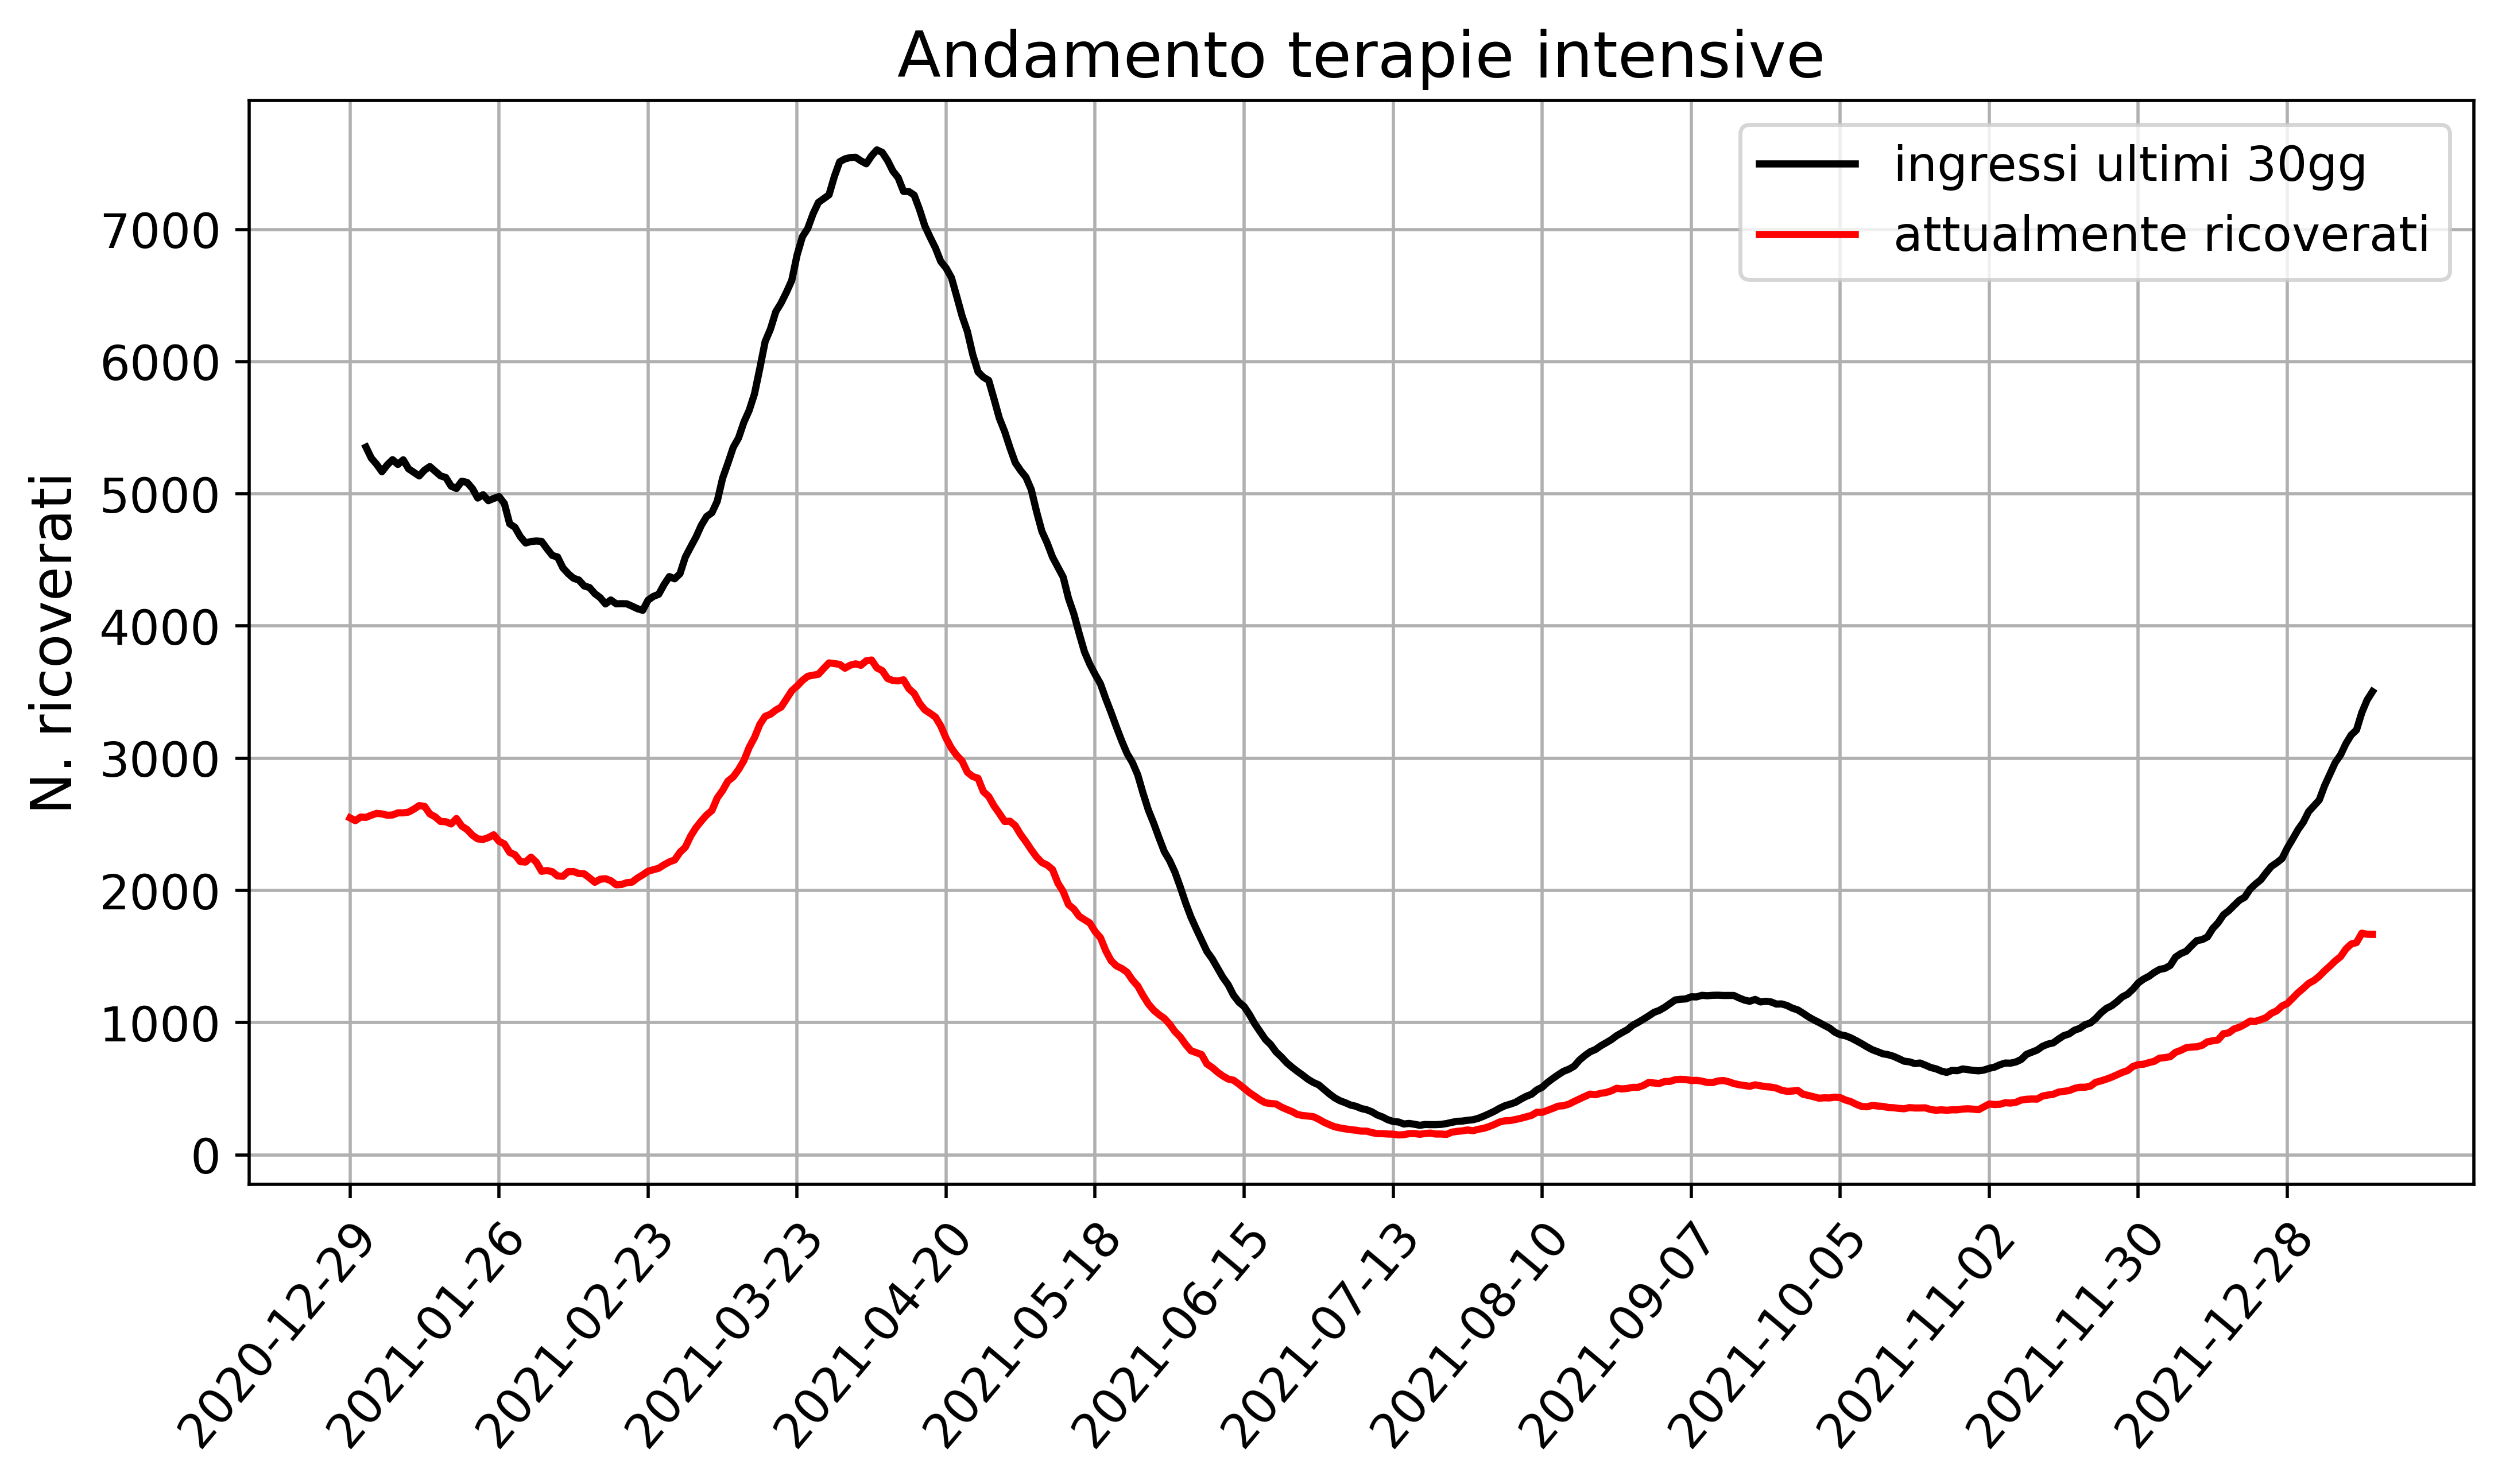

In [136]:
createXYPlot(df,
             y=["ingressi_terapia_intensiva_30","terapia_intensiva"],
             labels=["ingressi ultimi 30gg","attualmente ricoverati"],
             x="giorno",
             colors=["black","red"],
             days_interval=28,
             linewidth=1.8,
             dpis=500,
             plots_folder=plots_folder,
             start_date="2020-12-28",
             title="Andamento terapie intensive",
             ytitle="N. ricoverati"
            )

In [129]:
df[["giorno","ingressi_terapia_intensiva","ingressi_terapia_intensiva_30"]]

giorno  ingressi_terapia_intensiva  ingressi_terapia_intensiva_30
0    2022-01-13                       156.0                         3504.0
1    2022-01-12                       156.0                         3441.0
2    2022-01-11                       185.0                         3345.0
3    2022-01-10                       114.0                         3214.0
4    2022-01-09                       142.0                         3176.0
5    2022-01-08                       154.0                         3110.0
6    2022-01-07                       120.0                         3025.0
7    2022-01-06                       177.0                         2967.0
8    2022-01-05                       132.0                         2879.0
9    2022-01-04                       153.0                         2792.0
10   2022-01-03                       103.0                         2684.0
11   2022-01-02                       104.0                         2640.0
12   2022-01-01                       135.0                         2596.0
13   2021-12-31                       119.0                         2516.0
14   2021-12-30                       134.0                         2459.0
15   2021-12-29                       126.0                         2389.0
16   2021-12-28                       119.0                         2321.0
17   2021-12-27                       100.0                         2241.0
18   2021-12-26                        85.0                         2209.0
19   2021-12-25                       106.0                         2182.0
20   2021-12-24                       102.0                         2133.0
21   2021-12-23                        93.0                         2080.0
22   2021-12-22                        92.0                         2048.0
23   2021-12-21                        96.0                         2010.0
24   2021-12-20                        73.0                         1949.0
25   2021-12-19                        78.0                         1926.0
26   2021-12-18                        95.0                         1887.0
27   2021-12-17                        70.0                         1847.0
28   2021-12-16                       101.0                         1816.0
29   2021-12-15                        84.0                         1756.0
30   2021-12-14                        93.0                         1713.0
31   2021-12-13                        60.0                         1649.0
32   2021-12-12                        54.0                         1628.0
33   2021-12-11                        76.0                         1621.0
34   2021-12-10                        76.0                         1582.0
35   2021-12-09                        69.0                         1540.0
36   2021-12-08                        62.0                         1523.0
37   2021-12-07                        89.0                         1496.0
38   2021-12-06                        45.0                         1433.0
39   2021-12-05                        45.0                         1411.0
40   2021-12-04                        59.0                         1403.0
41   2021-12-03                        60.0                         1380.0
42   2021-12-02                        55.0                         1351.0
43   2021-12-01                        62.0                         1330.0
44   2021-11-30                        64.0                         1301.0
45   2021-11-29                        58.0                         1254.0
46   2021-11-28                        39.0                         1216.0
47   2021-11-27                        68.0                         1195.0
48   2021-11-26                        58.0                         1159.0
49   2021-11-25                        57.0                         1128.0
50   2021-11-24                        49.0                         1108.0
51   2021-11-23                        61.0                         1075.0
52   2021-11-22                   